In this notebook we will estimate AR1 models with the trigonometric periodicity component with orders superiors than 1.

In [1]:
cd((@__DIR__) * raw"\..")
include("../table_reader.jl")
include("../utils/utils.jl")
include("../utils/Missing_values.jl")
series=extract_series("TX_STAID000031.txt")
series=truncate_MV(series,"TX")

include("../utils/Simulation.jl")
Days_list=GatherYearScenario(series[!,2],series.DATE)
avg_day=mean.(Days_list)
max_day=maximum.(Days_list)
df_month = @chain series begin
    @transform(:TEMP = series[!,2]) #Give a common name for TX, TN, etc...
    @transform(:MONTH = month.(:DATE)) #add month column
    @by(:MONTH, :MONTHLY_MEAN = mean(:TEMP), :MONTHLY_STD = std(:TEMP), :MONTHLY_MAX = maximum(:TEMP)) # grouby MONTH + takes the mean/std in each category 
end

12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       1.17685     0.332309         2.12
   2 │     2       1.28727     0.331852         2.27
   3 │     3       1.54382     0.311683         2.61
   4 │     4       1.79017     0.303244         2.62
   5 │     5       2.19996     0.325811         3.19
   6 │     6       2.54889     0.309155         3.6
   7 │     7       2.85561     0.300014         4.06
   8 │     8       2.80813     0.278482         3.64
   9 │     9       2.47622     0.280431         3.3
  10 │    10       2.06394     0.312442         3.09
  11 │    11       1.52238     0.335048         2.43
  12 │    12       1.23495     0.328123         2.31

# Order = 2

In this model the periodicity $S_t$ will follow this equation :  $S_t = \mu + a_1\cos(\frac{2πt}{365.25}) + b_1\sin(\frac{2πt}{365.25}) + a_2\cos(2 \times \frac{2πt}{365.25}) + b_2\sin(2 \times \frac{2πt}{365.25})$.

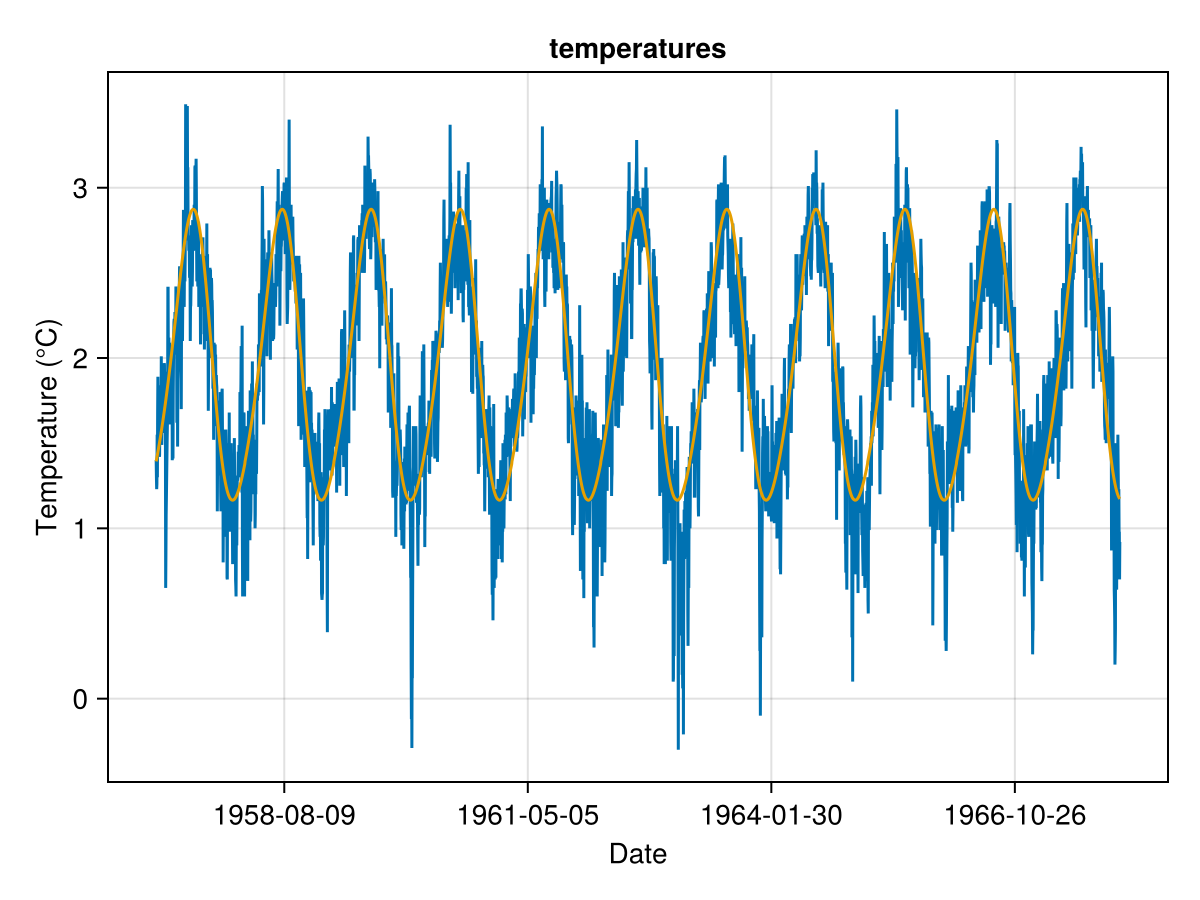

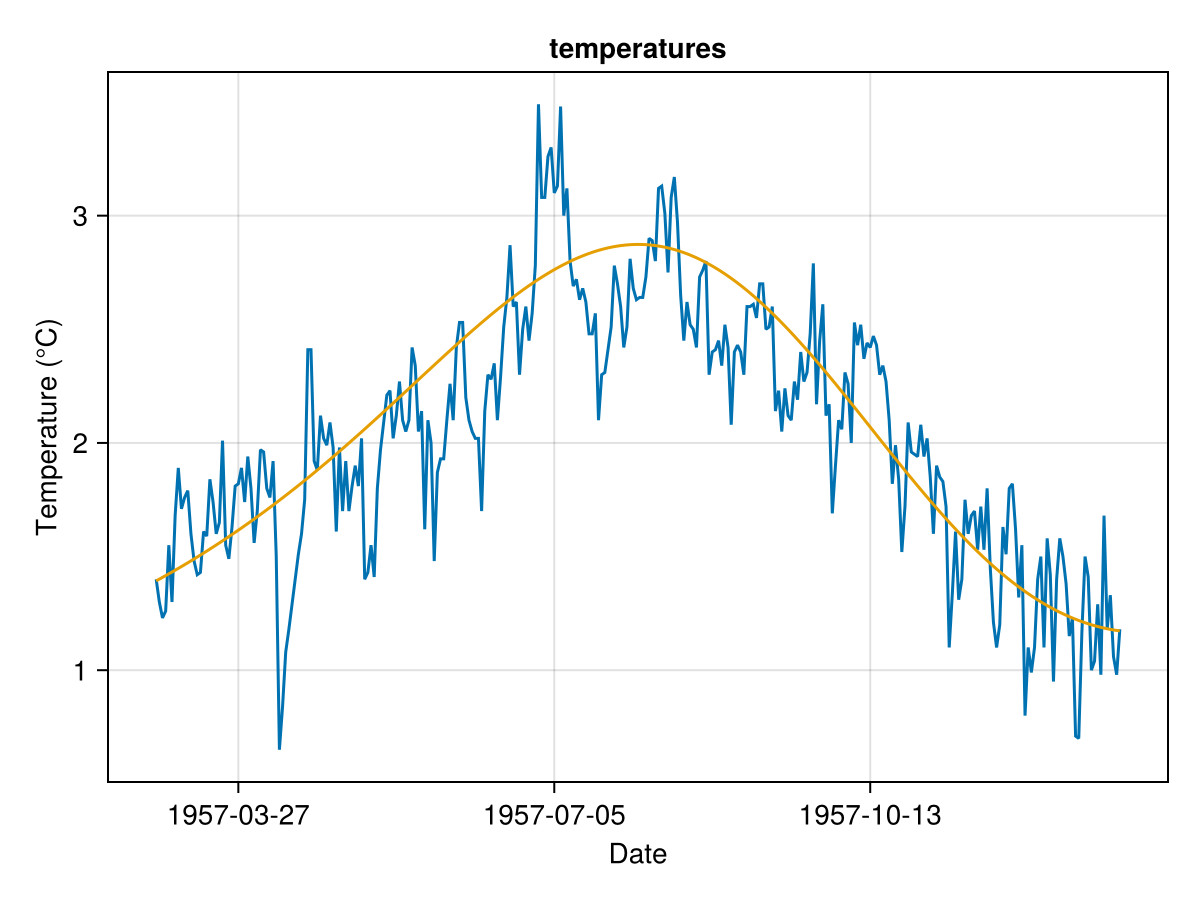

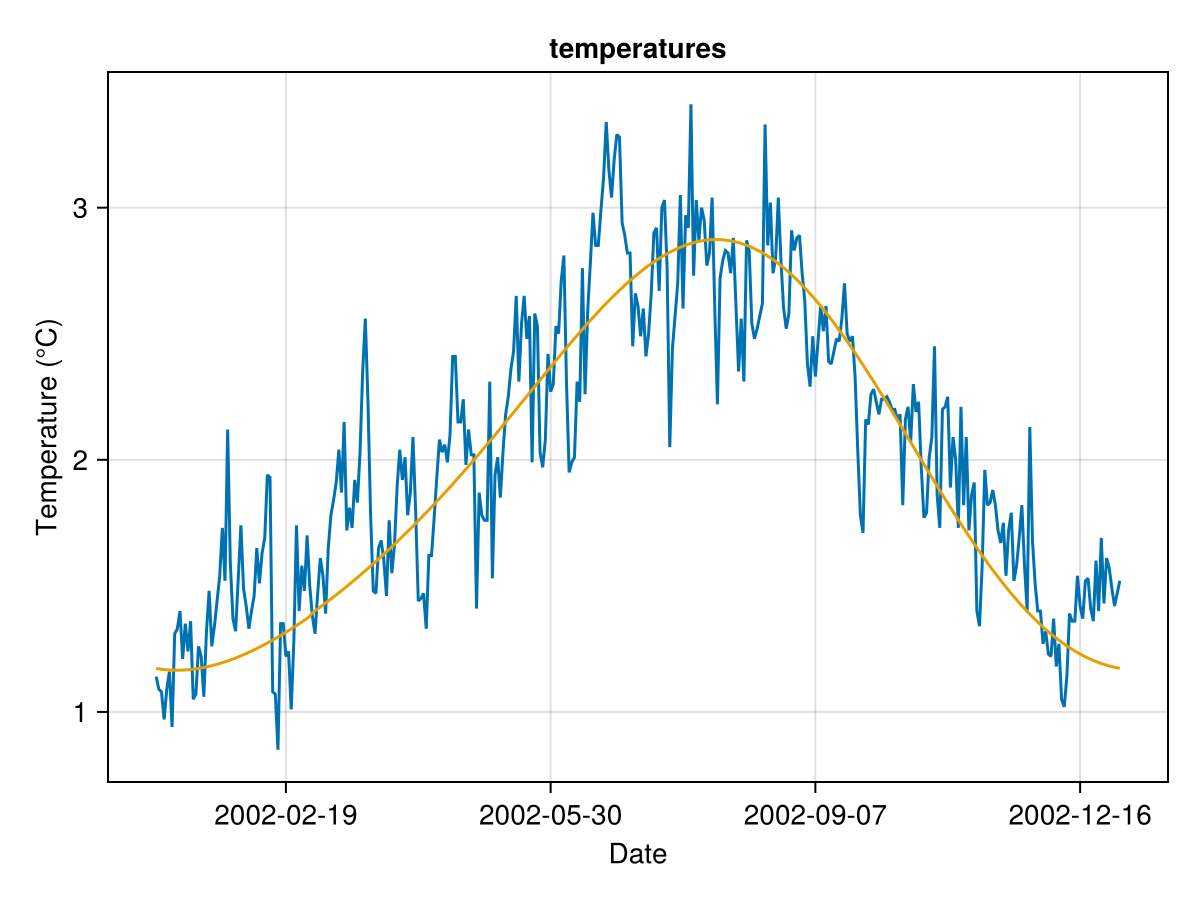

16832-element Vector{Float64}:
  0.006851973508104736
 -0.1007093048353831
 -0.17835629253979124
 -0.15608804466658066
  0.12609631478961503
 -0.1318024056869178
  0.24021653640841345
  0.4421538192686061
  0.2540100585671601
  0.2957858093712742
  ⋮
  0.27170229128045675
  0.06238104665741351
 -0.08701800102508939
 -0.17649492085883622
  0.01395020501612243
  0.2943172848524762
  0.3346062207781795
  0.18481691231537534
  0.24494925993054362

In [2]:
include("../utils/Periodicity.jl")
trigo_function=fitted_periodicity_fonc(series[!,2],series.DATE, OrderTrig=2)
periodicity2=trigo_function.(series.DATE)
period2=trigo_function.(Date(0):Date(1)-Day(1))

Myyear=Iyear(series.DATE,year(series.DATE[1]):year(series.DATE[1]) + 10)
fig1, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig1)

Myyear=Iyear(series.DATE,year(series.DATE[1]))
fig2, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig2)

Myyear=Iyear(series.DATE,year(series.DATE[end])-1)
fig3, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig3)

x=series[!,2]-periodicity2

### Order = 1 versus Order = 2 trigonometric estimation

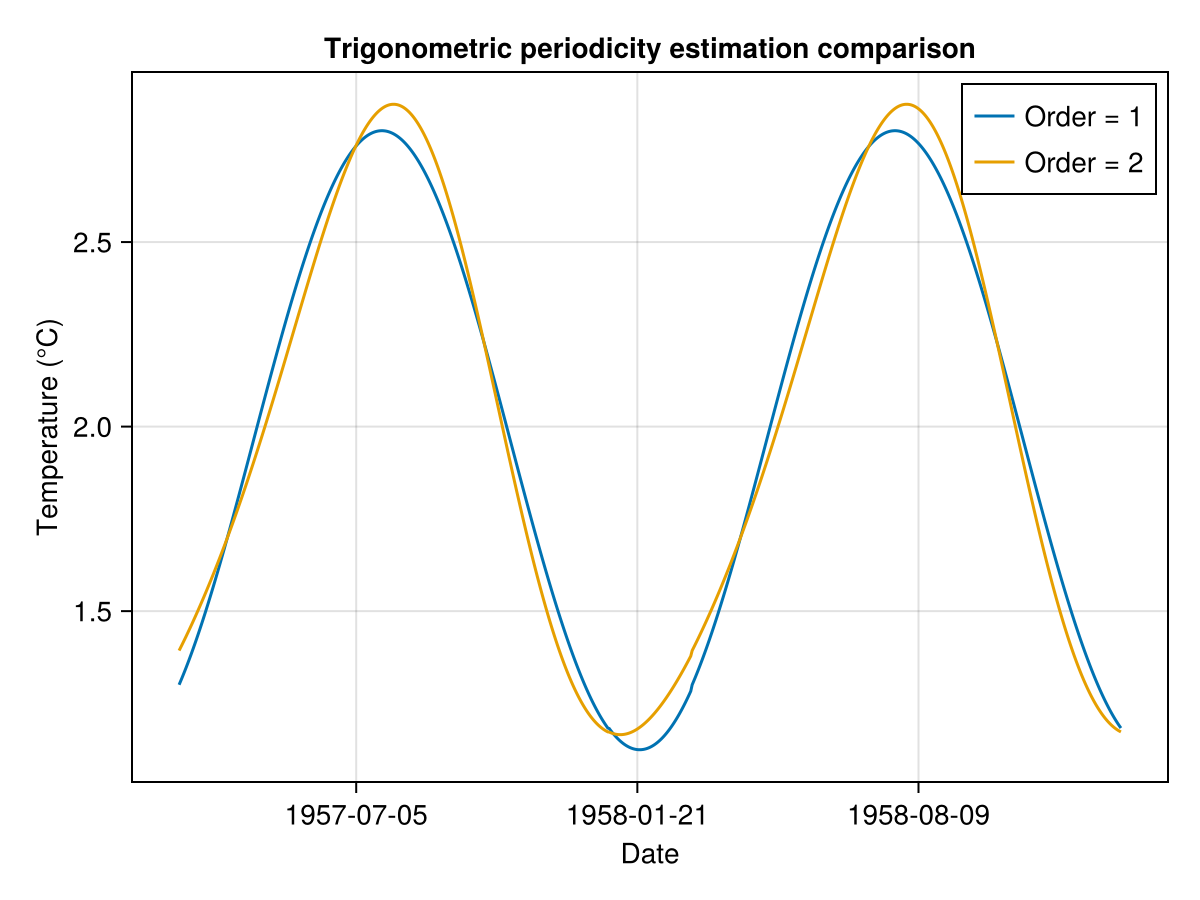

CairoMakie.Screen{IMAGE}


In [3]:
periodicity1=fitted_periodicity_fonc(series[!,2],series.DATE, OrderTrig=1).(series.DATE)

Myyear=Iyear(series.DATE,year(series.DATE[1]):year(series.DATE[1]) + 1)
fig, ax, plt1 = lines(series.DATE[Myyear],periodicity1[Myyear])
plt2 = lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
ax.title="Trigonometric periodicity estimation comparison"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
axislegend(ax,[plt1,plt2],["Order = 1","Order = 2"])
display(fig)


## Autocorrelations

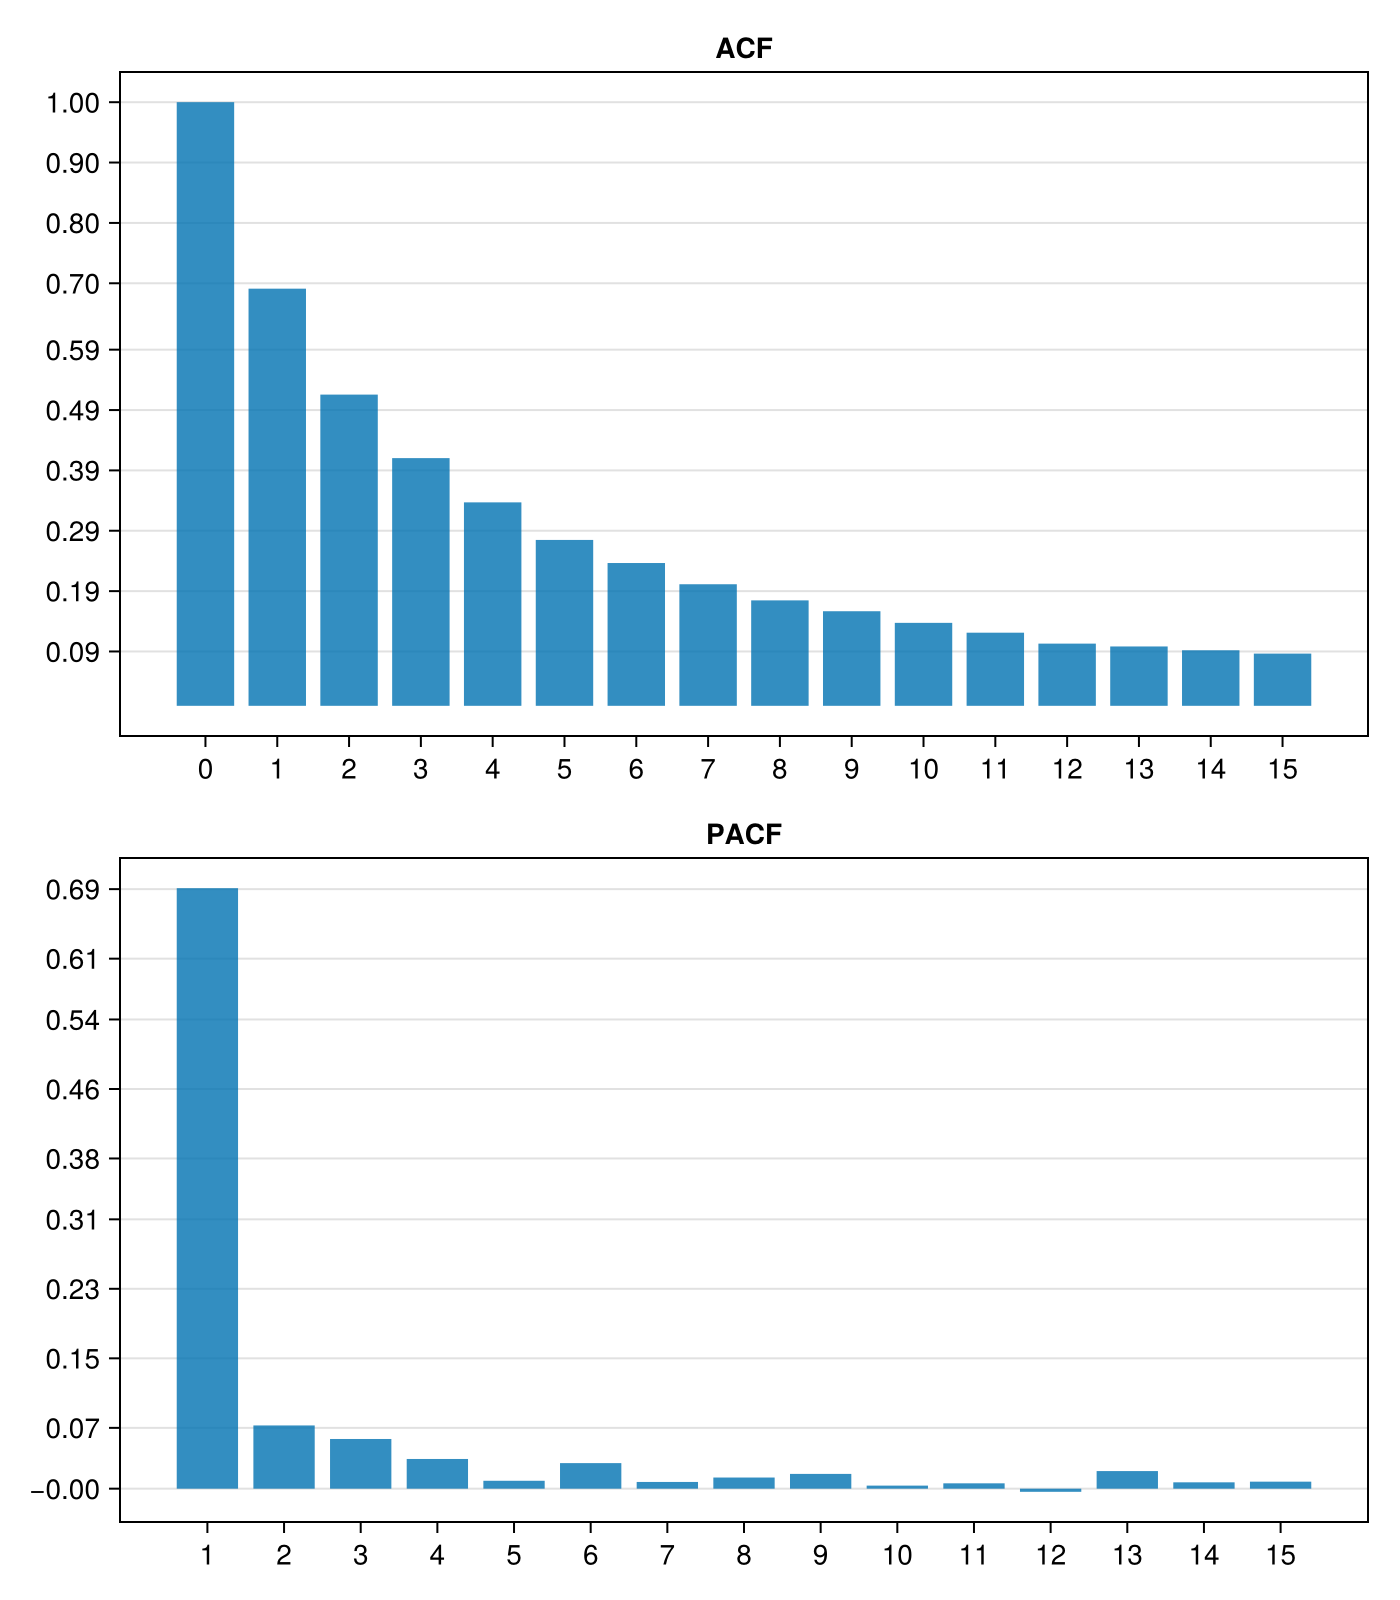

In [4]:
include("../utils/ACF_PACF.jl")
ACF_PACF(x)

It still looks like an AR(1) model

## Estimation with Likelihood : AR(1)

In [5]:
include("../utils/Estimation.jl")
p=1
Φ, σ=LL_AR_Estimation(x,p)

ERROR: LoadError: too many parameters for type AbstractInterpolation
Stacktrace:
 [1] top-level scope
   @ C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:28
 [2] include
   @ .\Base.jl:557 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2881
 [4] top-level scope
   @ stdin:6
in expression starting at C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:3
in expression starting at stdin:6
┌ Error: Error during loading of extension SparseConnectivityTracerDataInterpolationsExt of SparseConnectivityTracer, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile SparseConnectivityTracerDataInterpolationsExt [

([0.6910868033534253], 0.2174226408942903)

## Sampling simulations

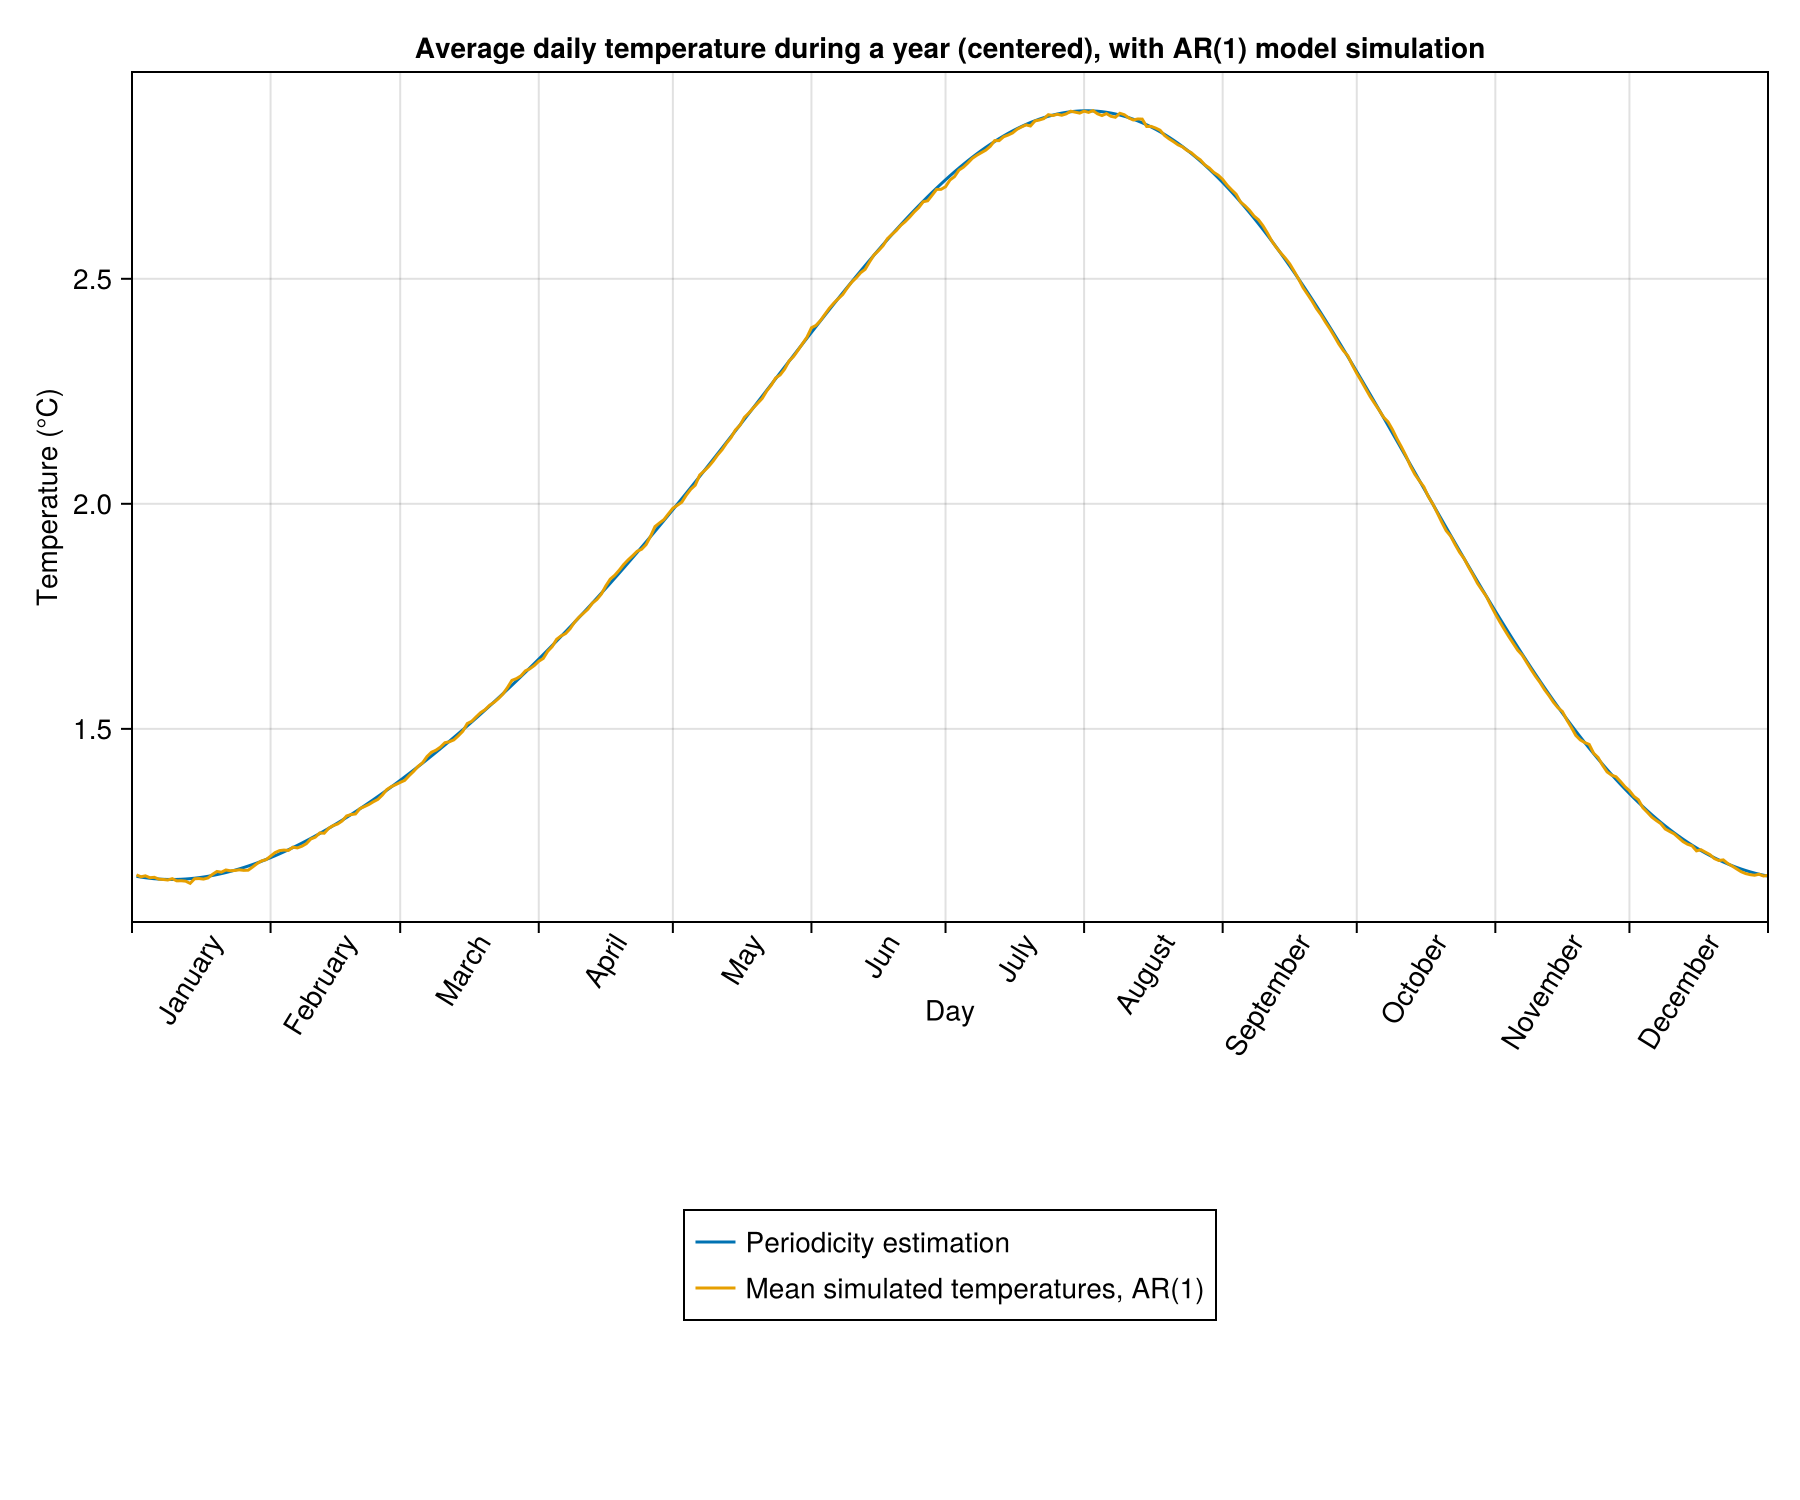

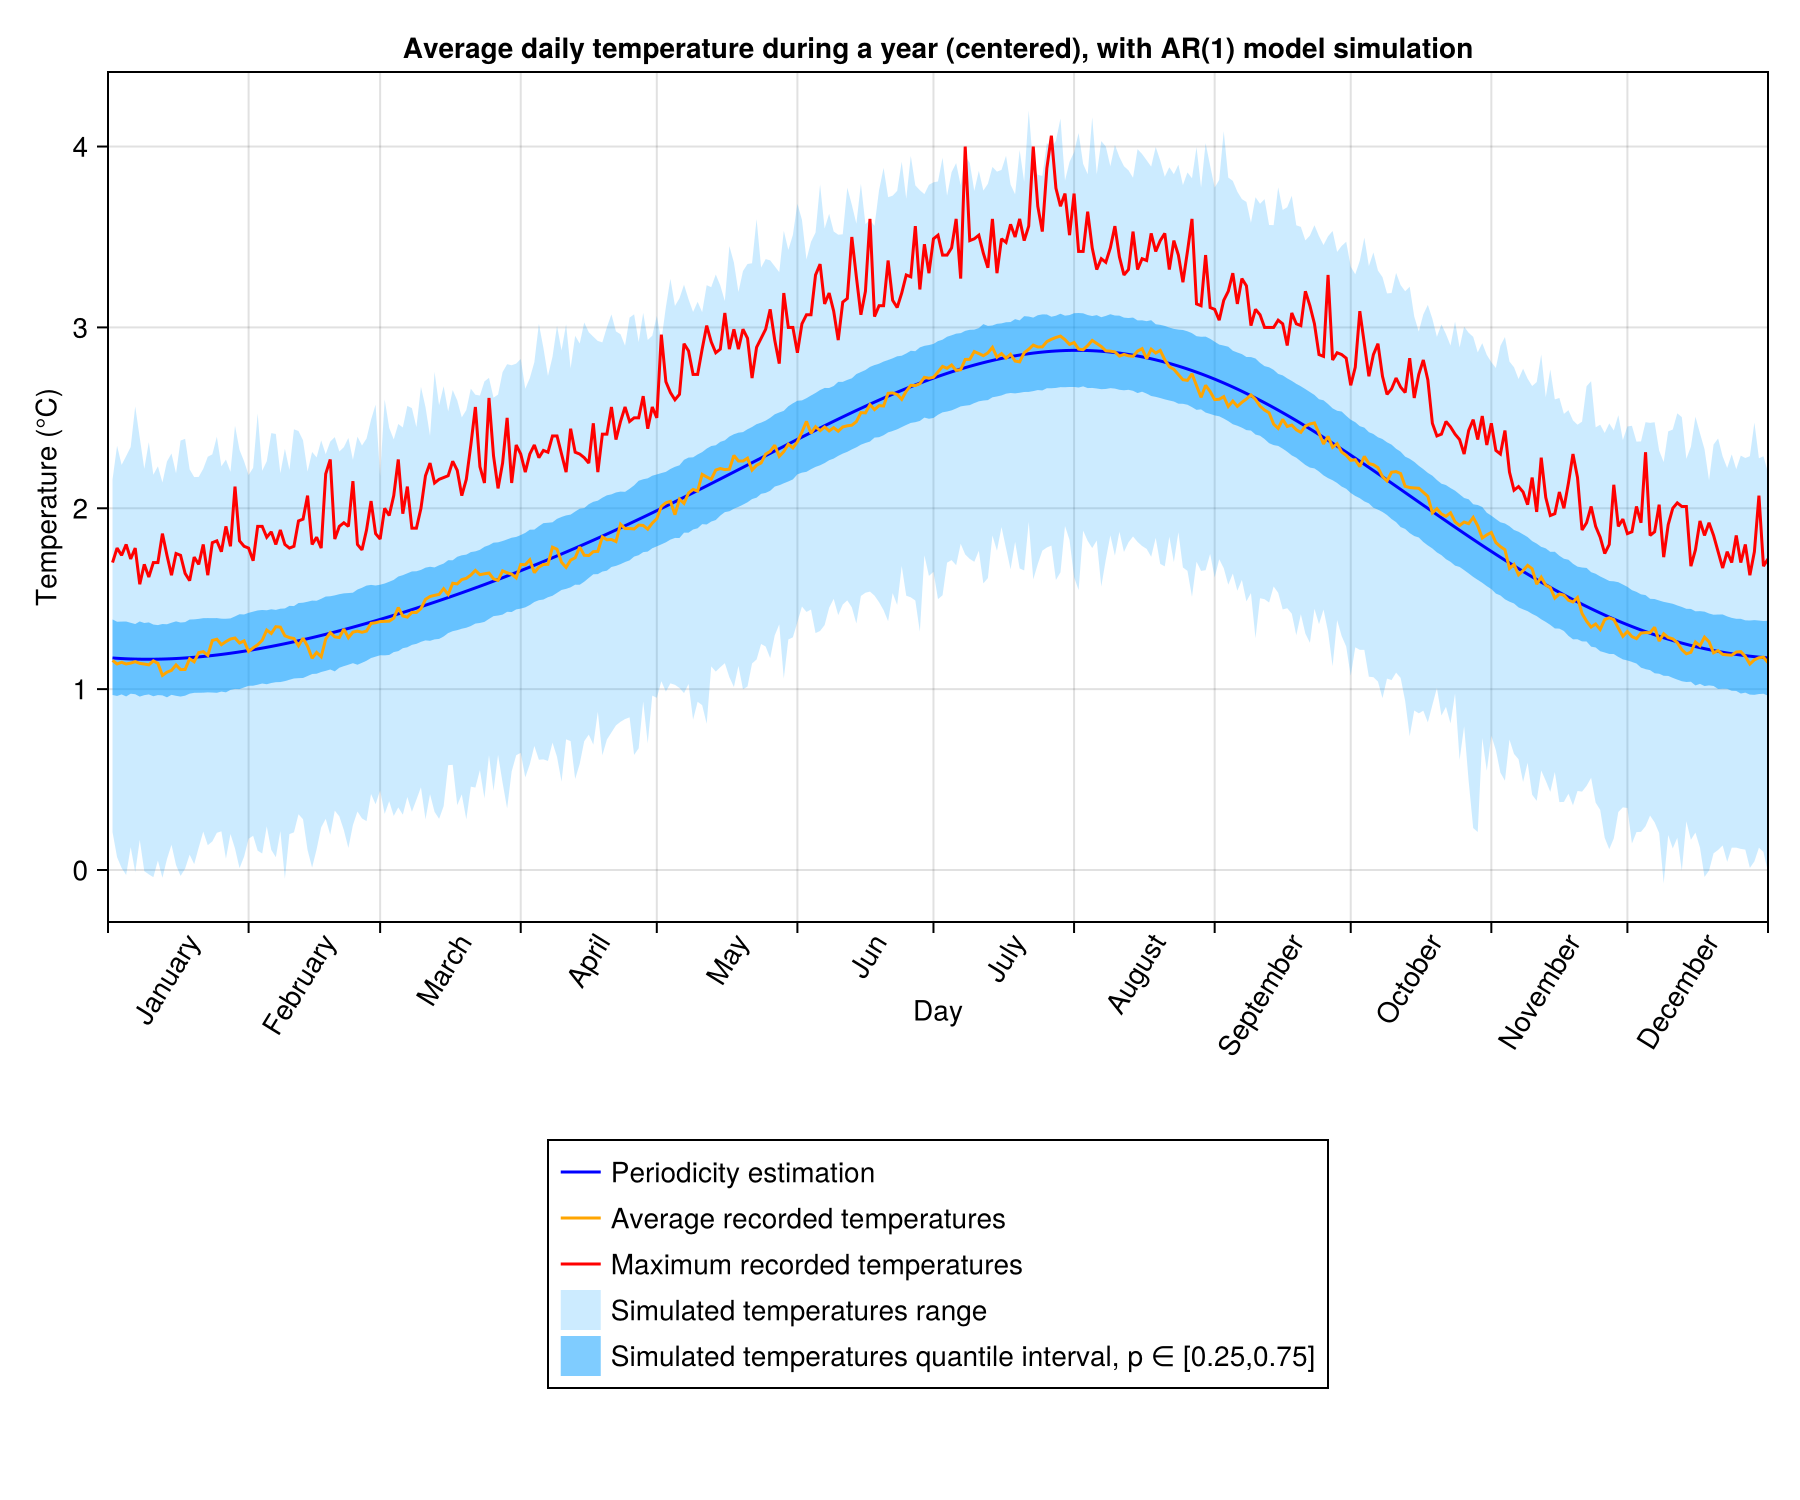

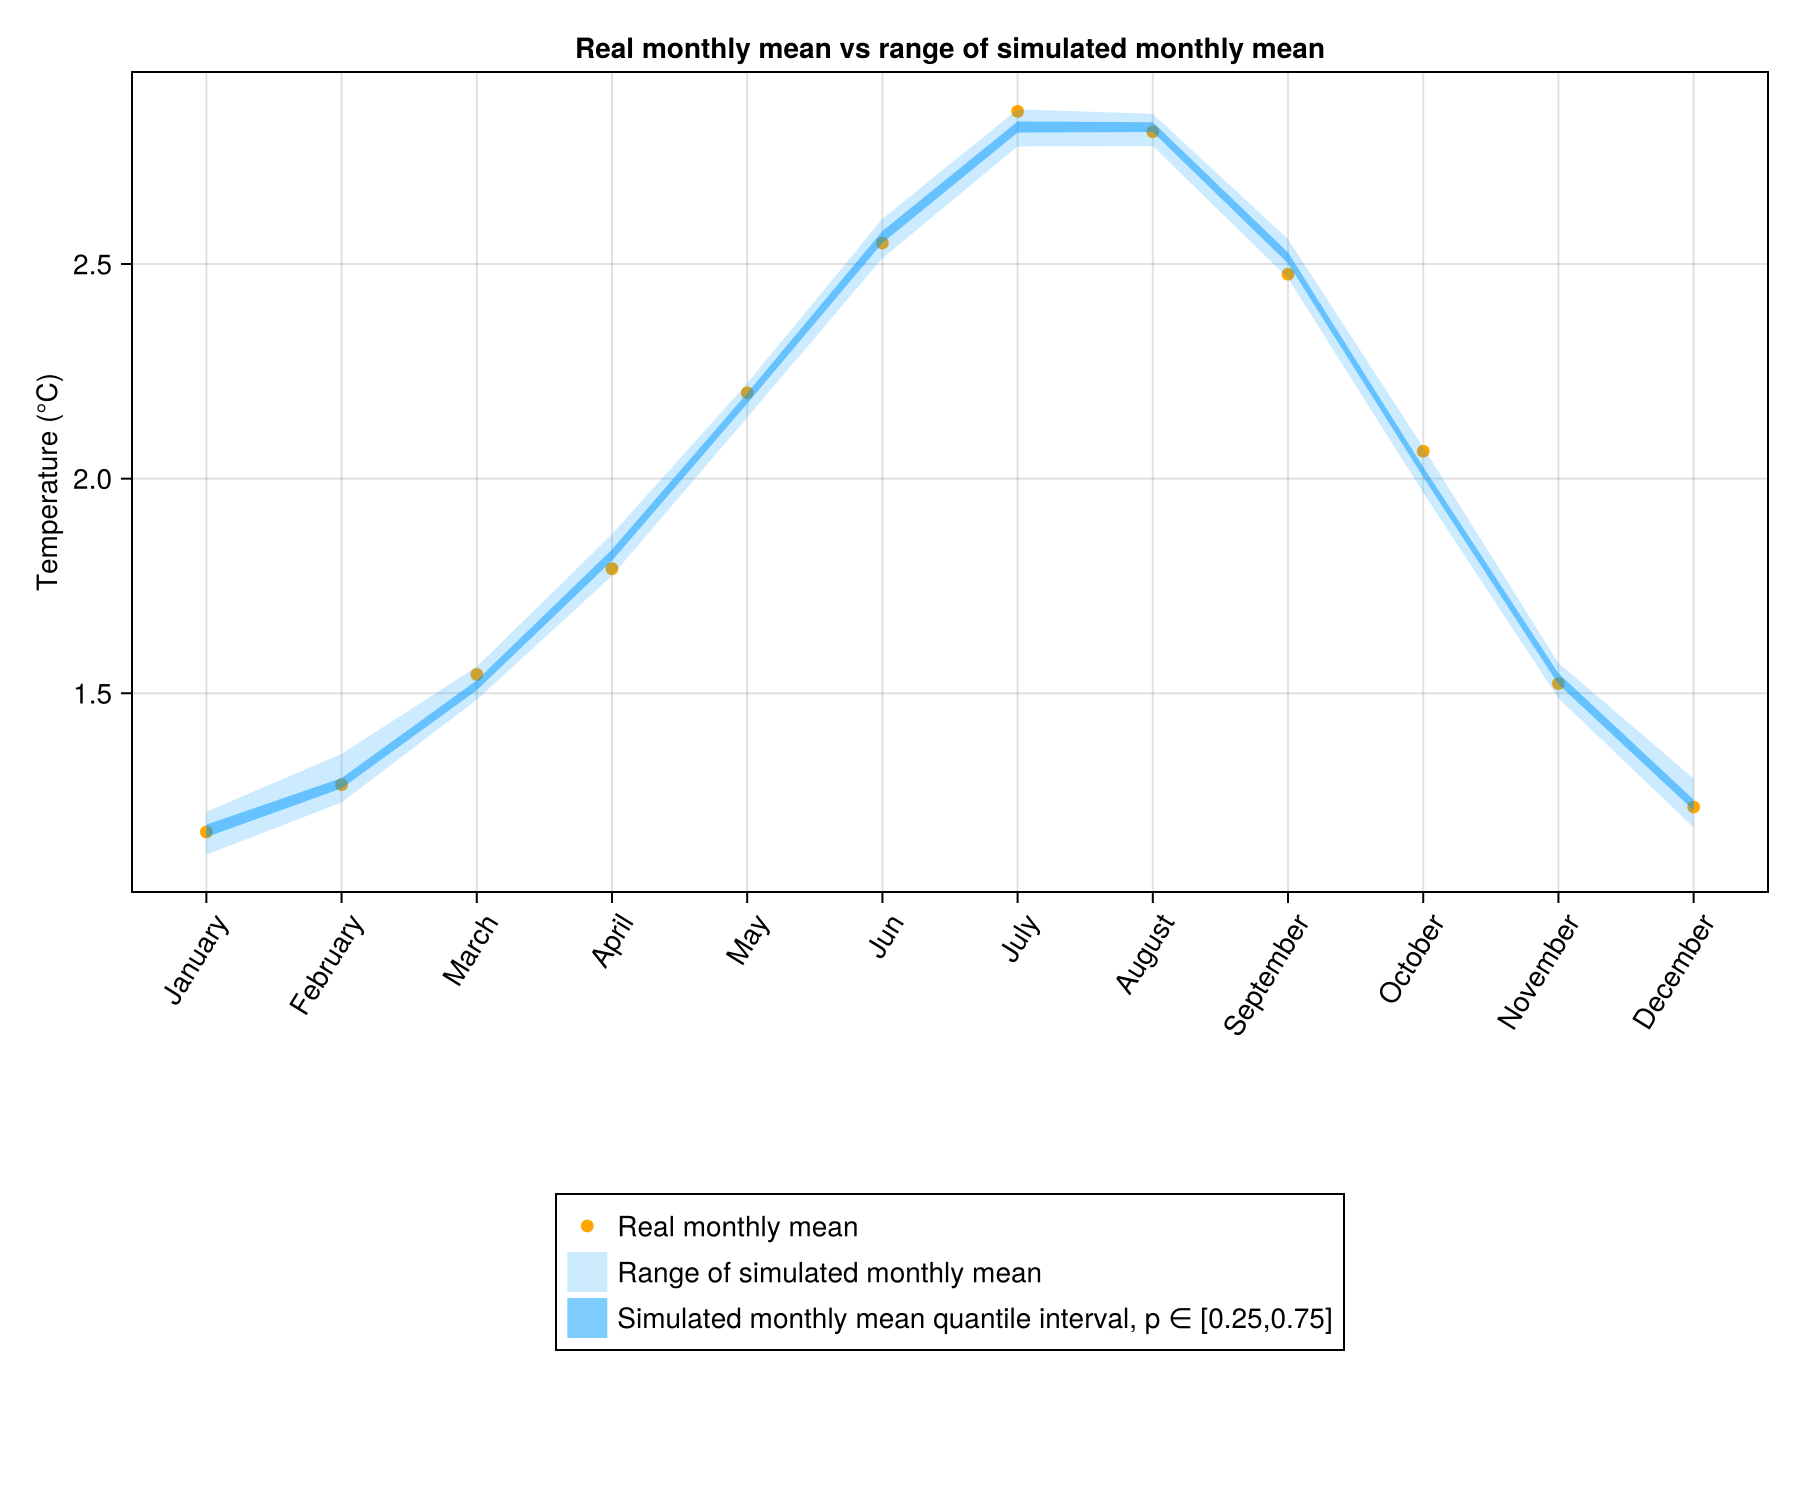

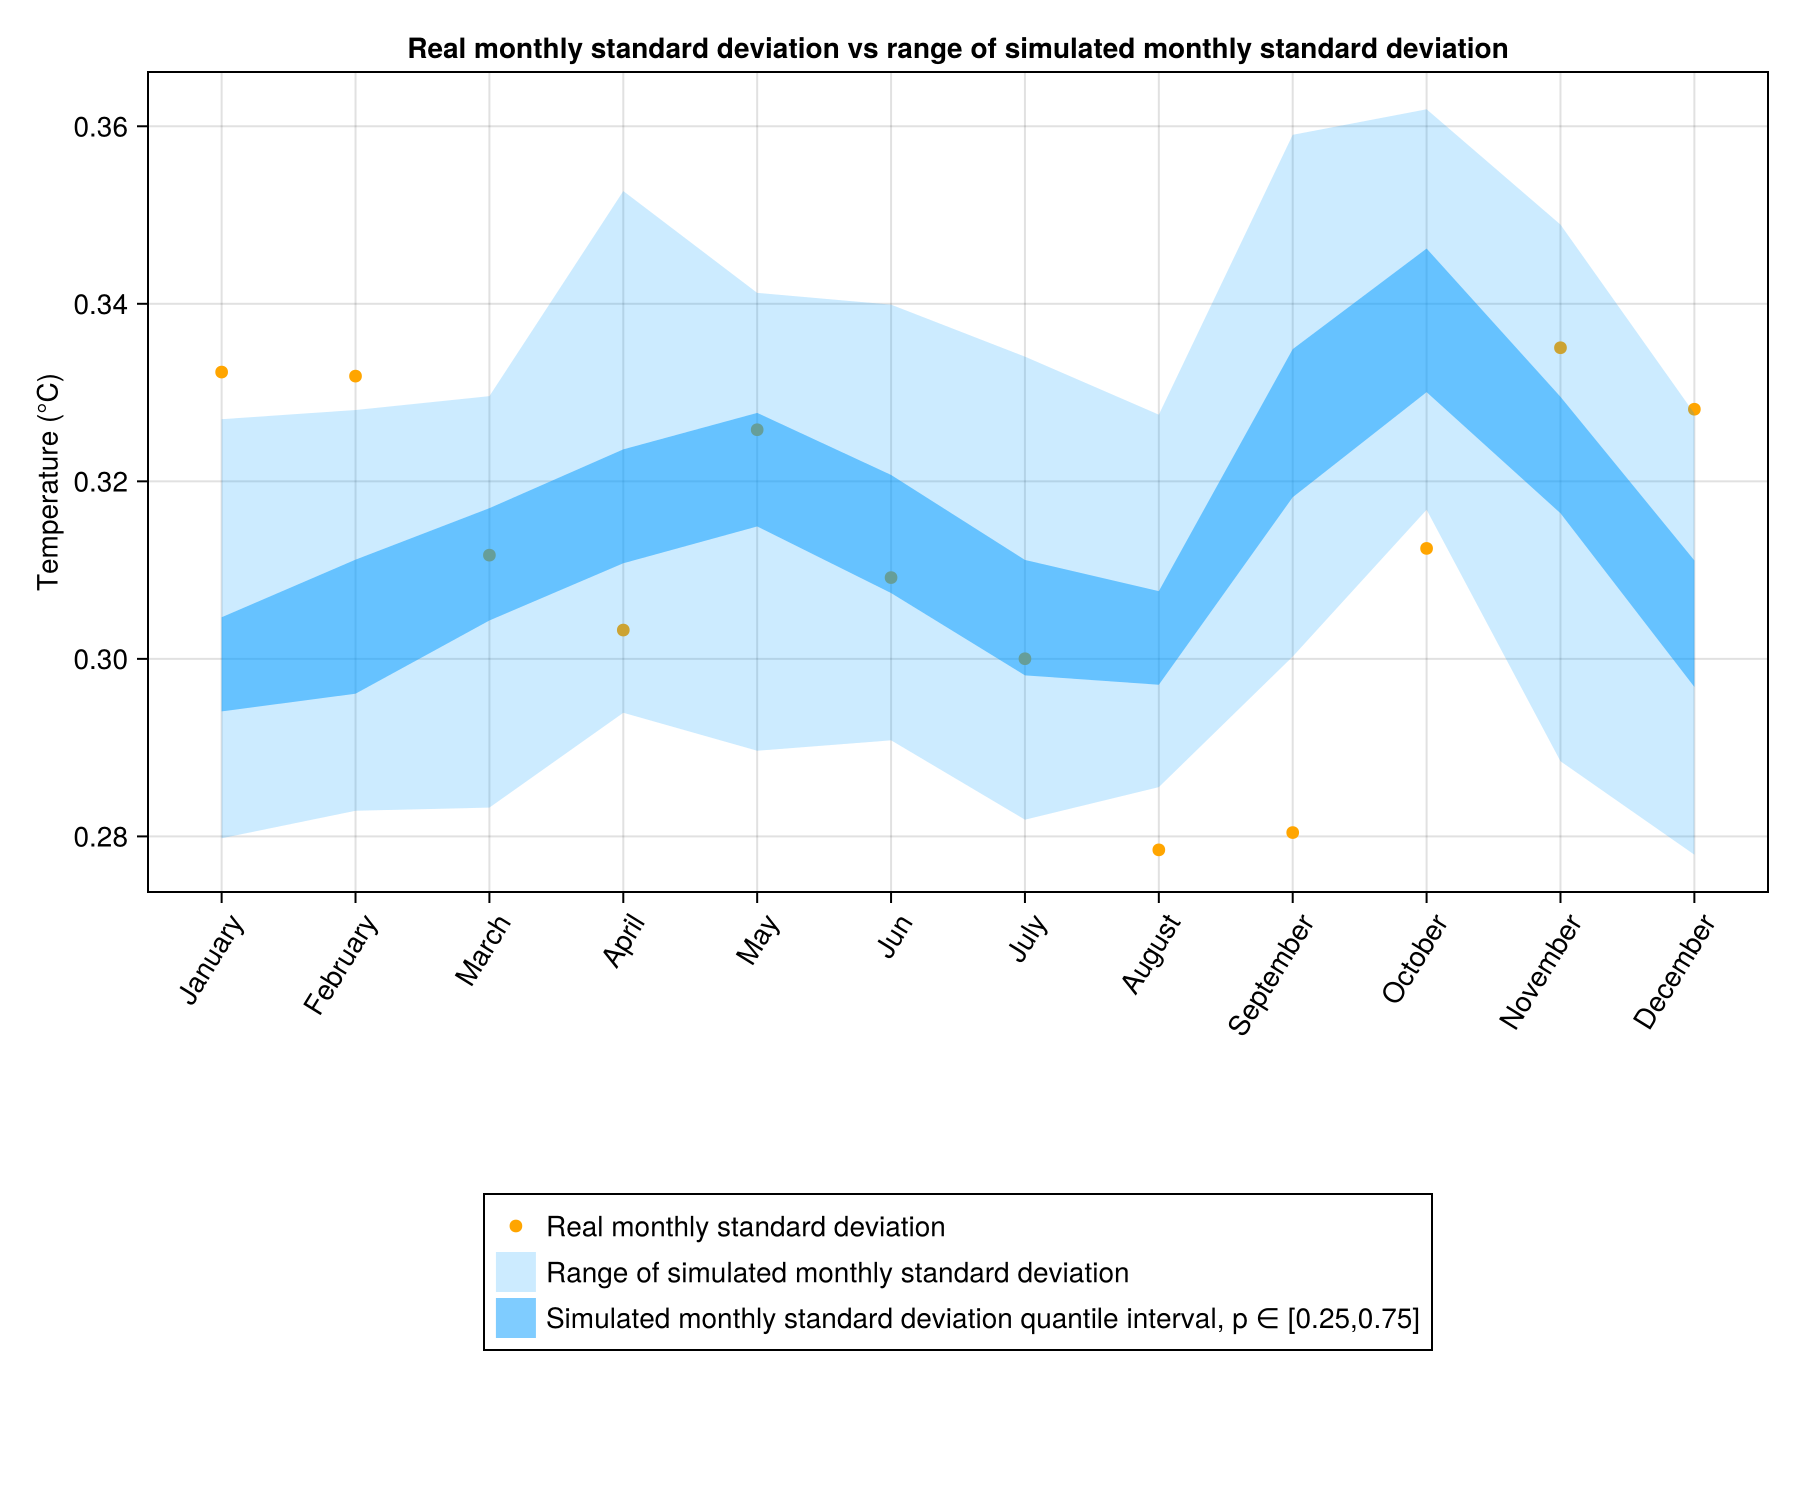

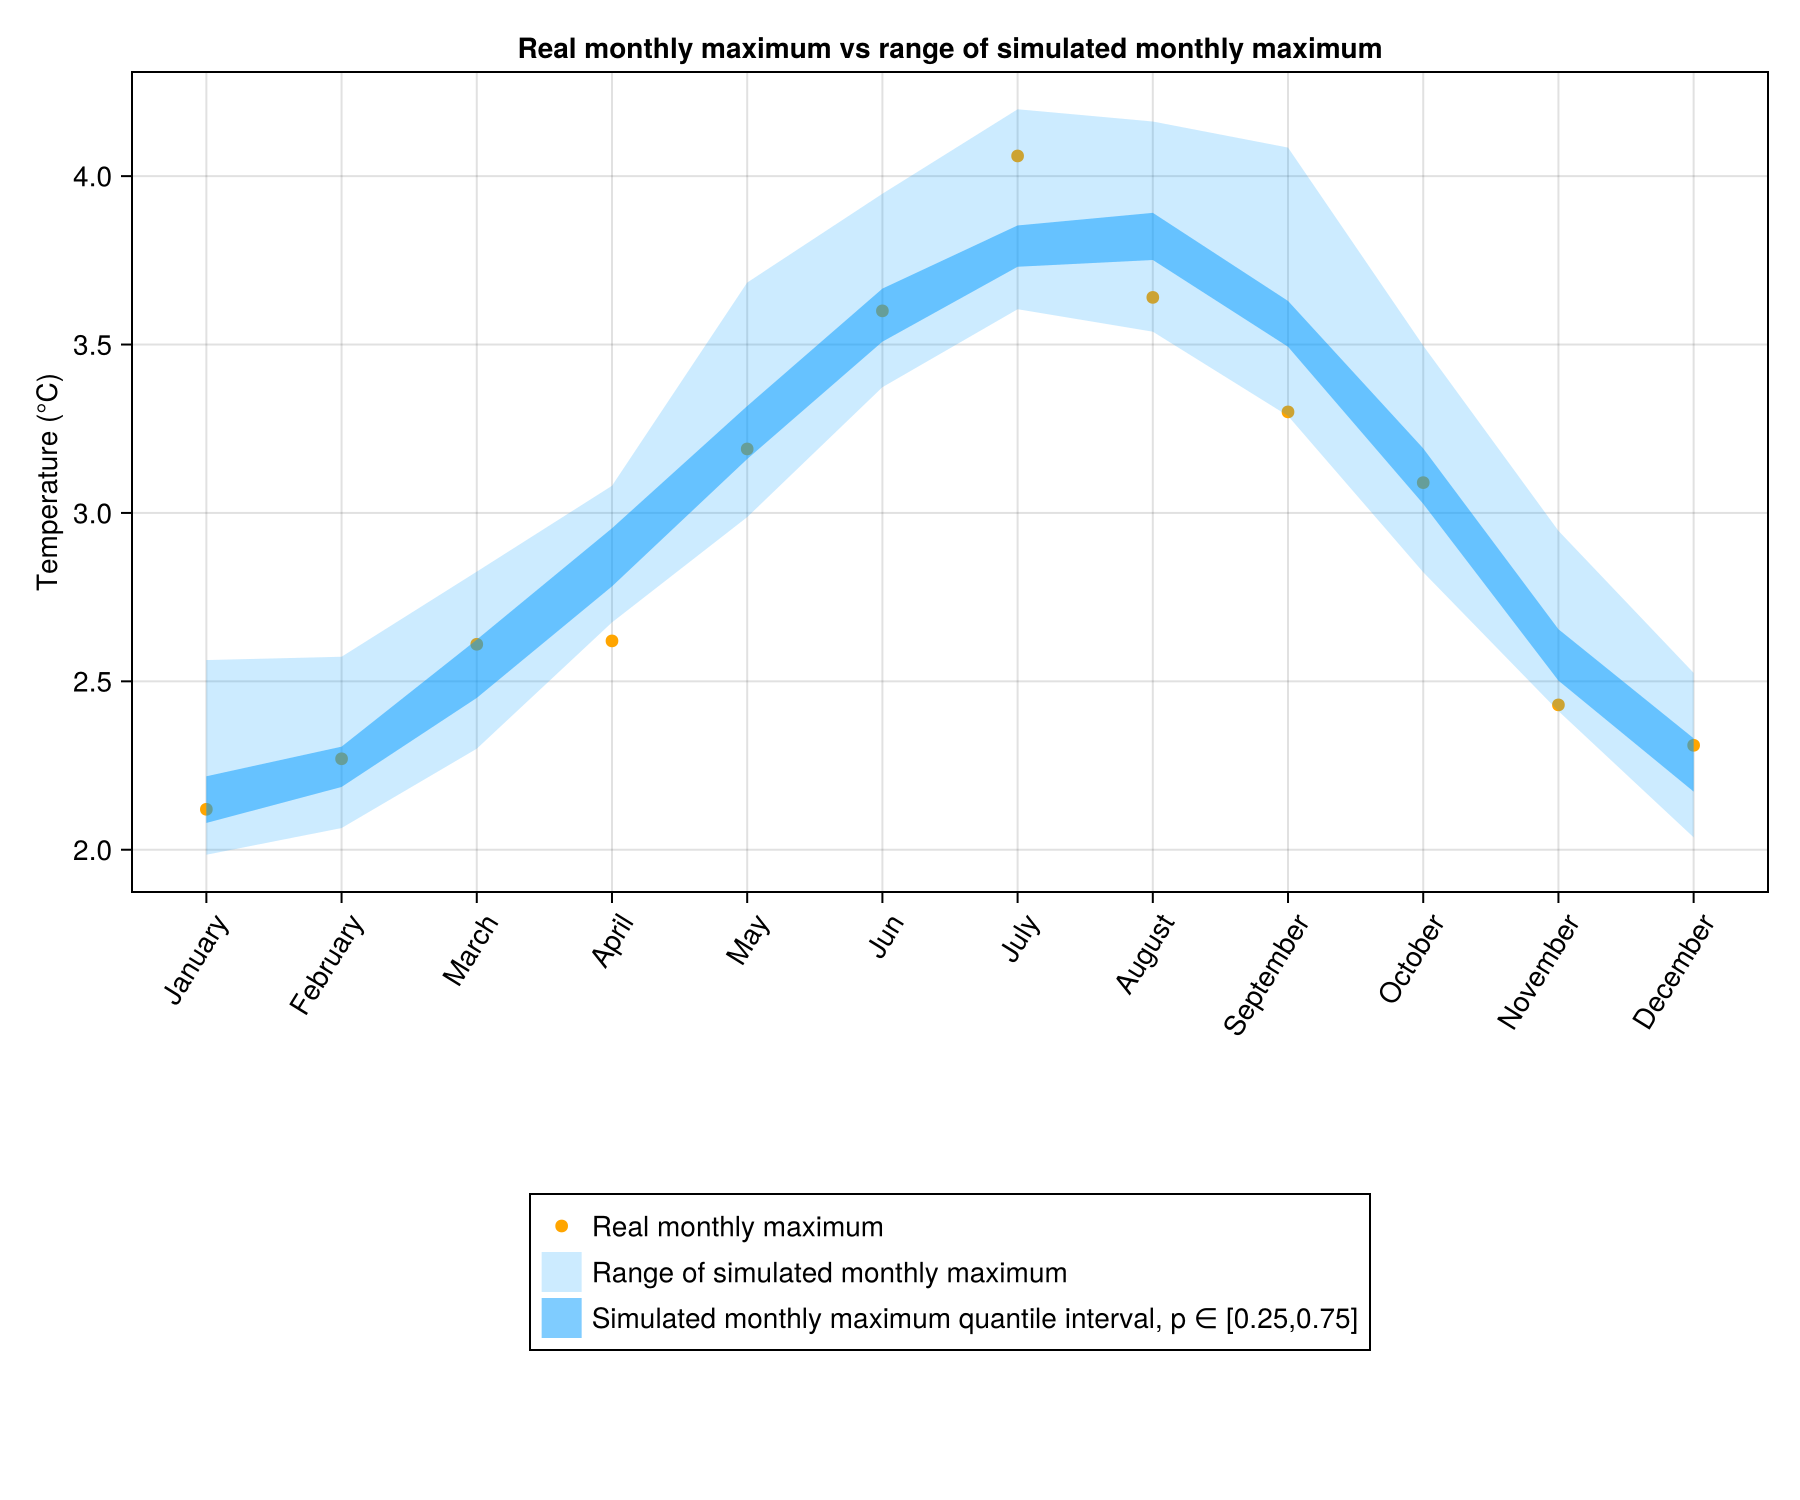

(CairoMakie.Screen{CairoMakie.IMAGE}(Scene (900px, 750px):
  0 Plots
  2 Child Scenes:
    ├ Scene (900px, 750px)
    └ Scene (900px, 750px), Cairo.CairoSurfaceImage{ColorTypes.ARGB32}(Ptr{Nothing} @0x000001aa1b813b30, 1800.0, 1500.0, ColorTypes.ARGB32[ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); … ; ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8)]), Cairo.CairoContext(Ptr{Nothing} @0x000001

In [6]:
include("../utils/Simulation.jl")
include("../utils/Plotting.jl")
sample_ = SimulateScenarios(x[1:p], series.DATE[1]:series.DATE[end], Φ, σ, period2; n=100)
year_sample = GatherYearScenarios(sample_, series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period2, mean.(year_sample)], ["Periodicity estimation", "Mean simulated temperatures, AR($(p))"], "Average daily temperature during a year (centered), with AR($(p)) model simulation"))
display(PlotYearCurves([period2, avg_day, max_day],
    ["Periodicity estimation", "Average recorded temperatures", "Maximum recorded temperatures", "Simulated temperatures range", "Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
    "Average daily temperature during a year (centered), with AR($(p)) model simulation",
    [(minimum.(year_sample), maximum.(year_sample)), (quantile.(year_sample, 0.25), quantile.(year_sample, 0.75))],
    [("#009bff", 0.2), ("#009bff", 0.5)],
    colors=["blue", "orange", "red"]
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))

## Estimation with Likelihood : AR(2)

In [7]:
include("../utils/Estimation.jl")
p=2
Φ, σ=LL_AR_Estimation(x,p)

([0.6408004213996019, 0.07276801938425405], 0.21685117211950383)

## Sampling simulations

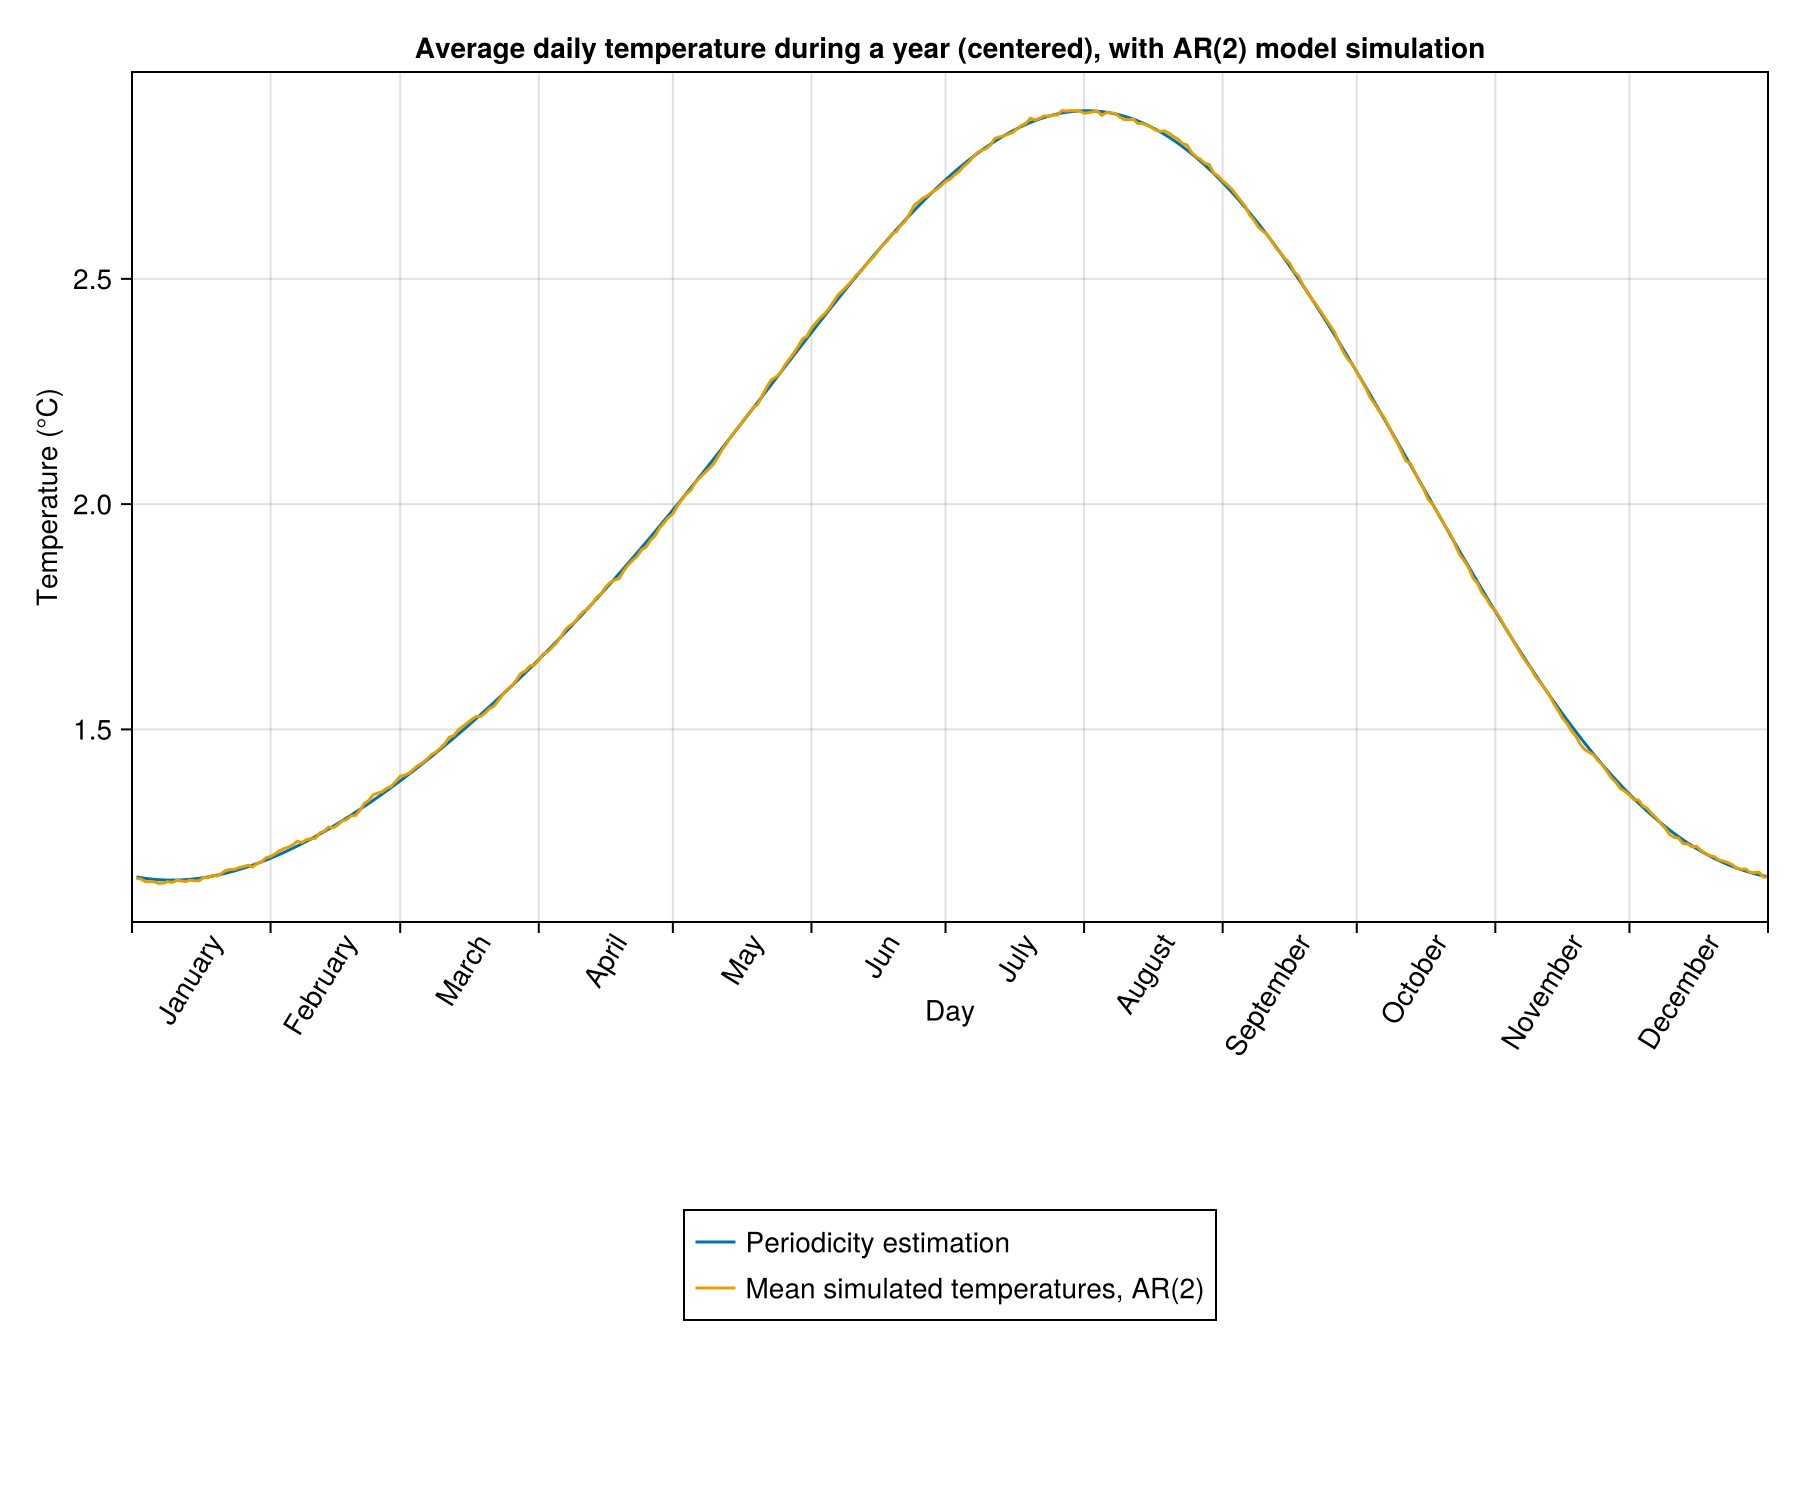

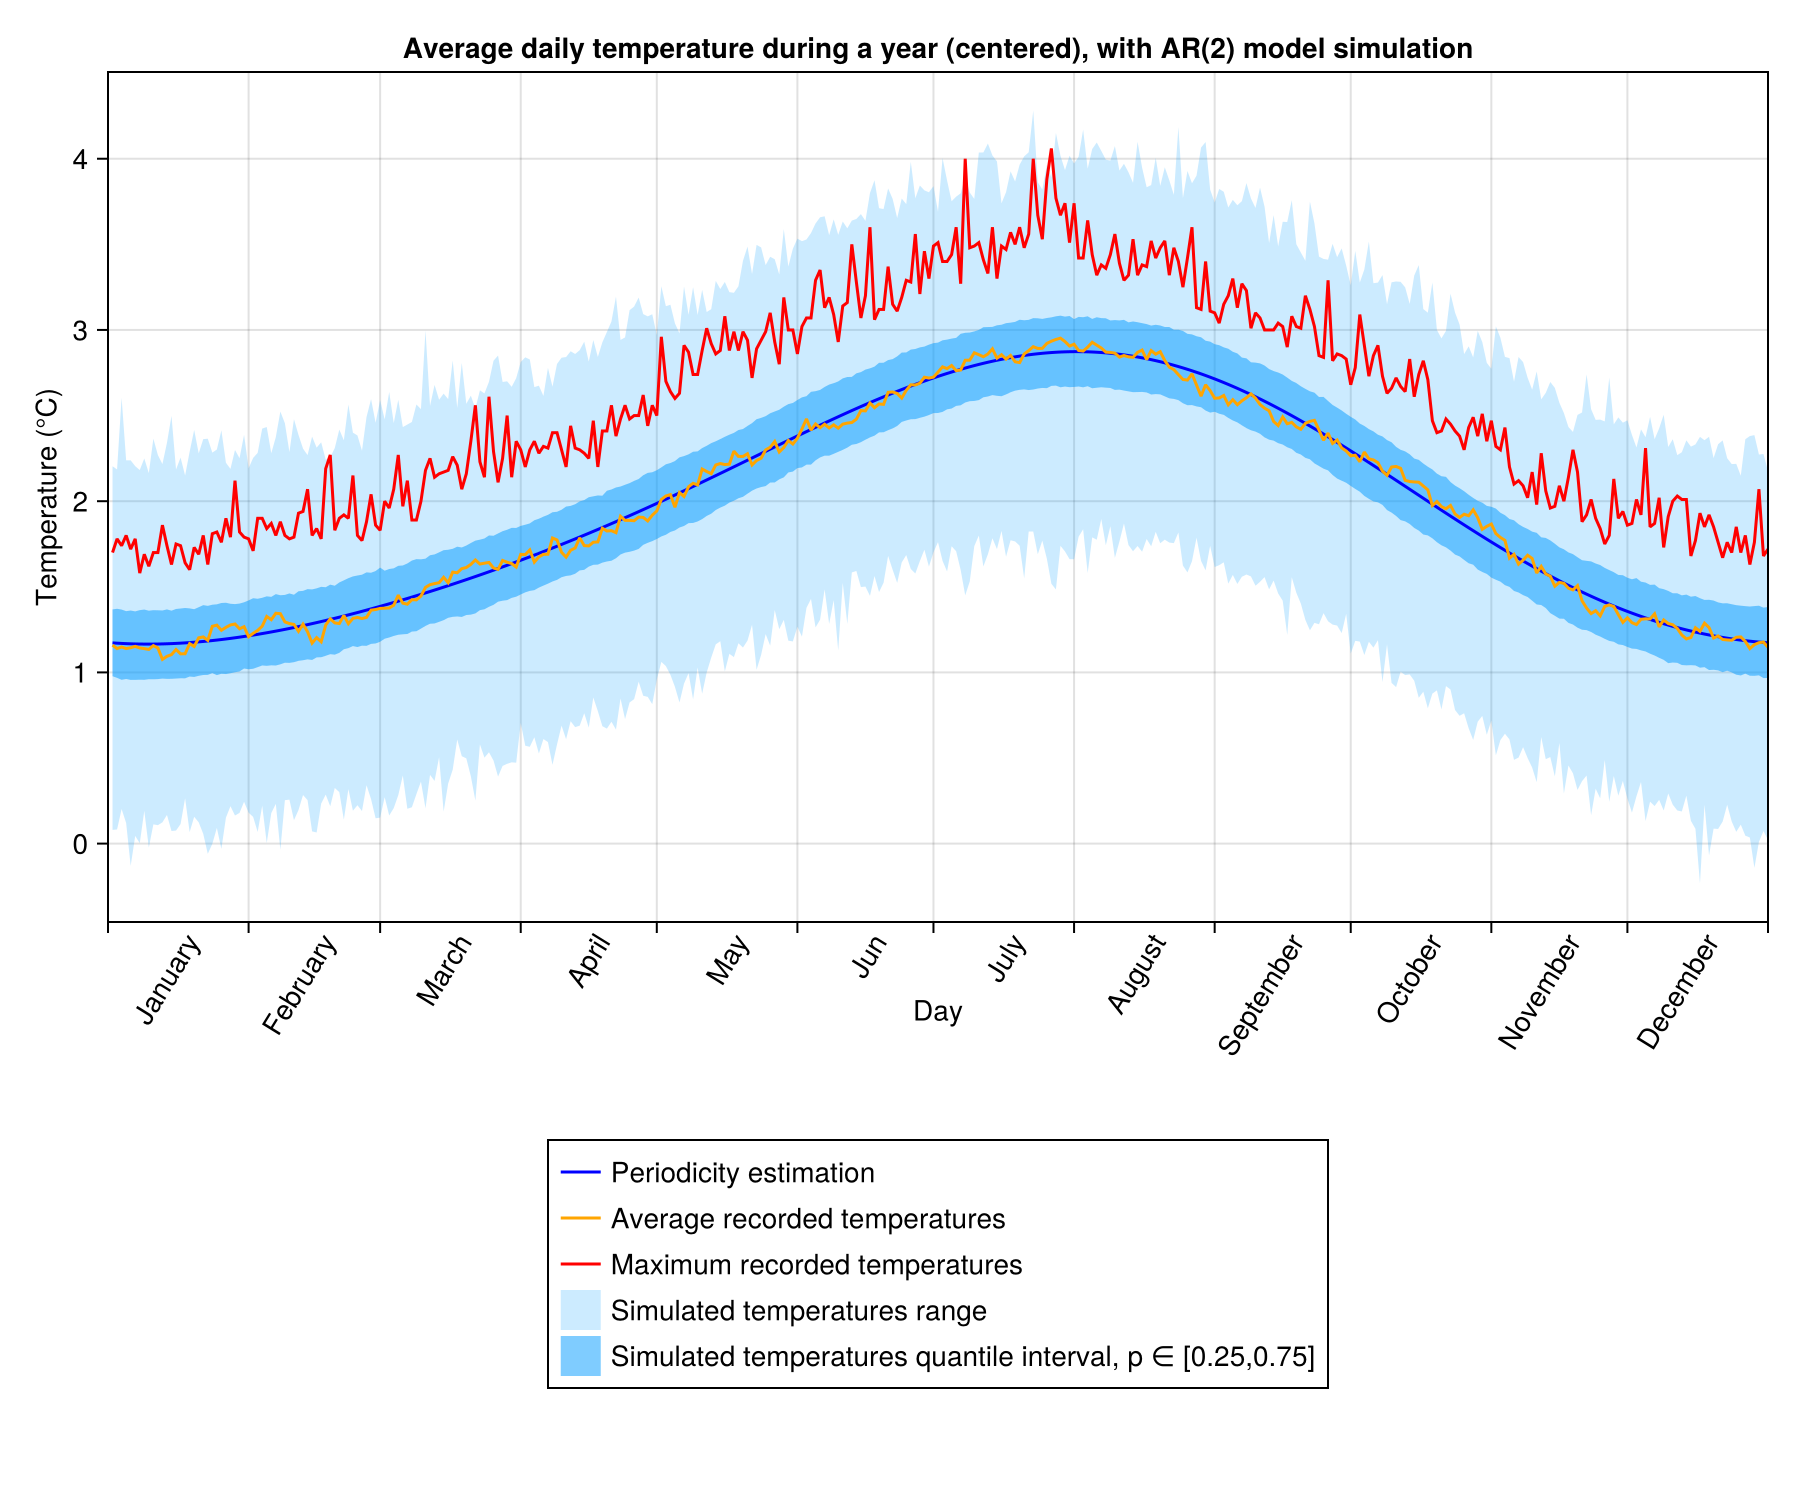

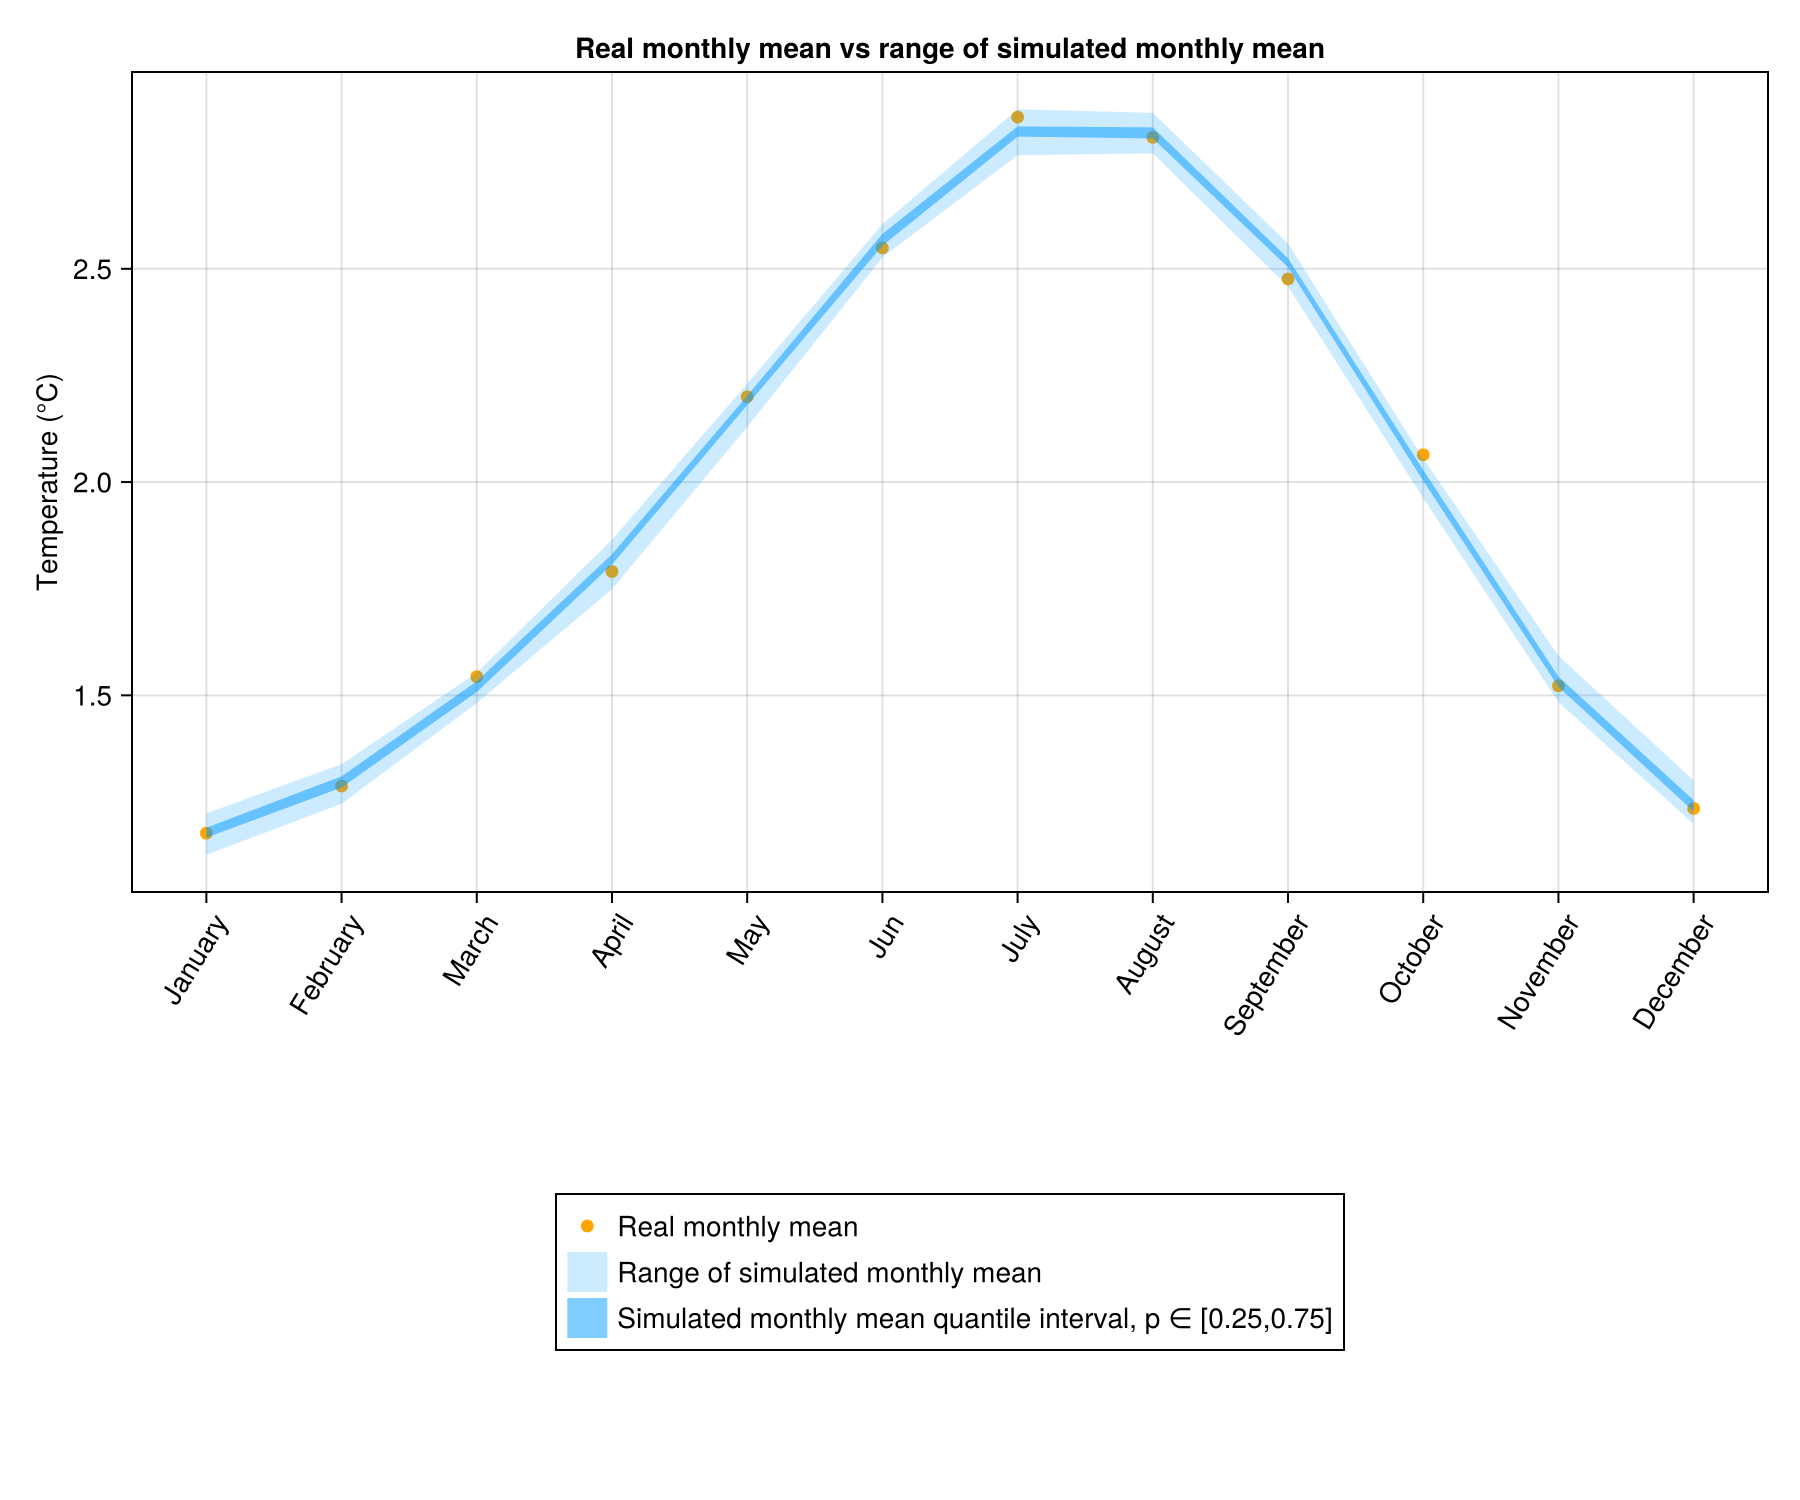

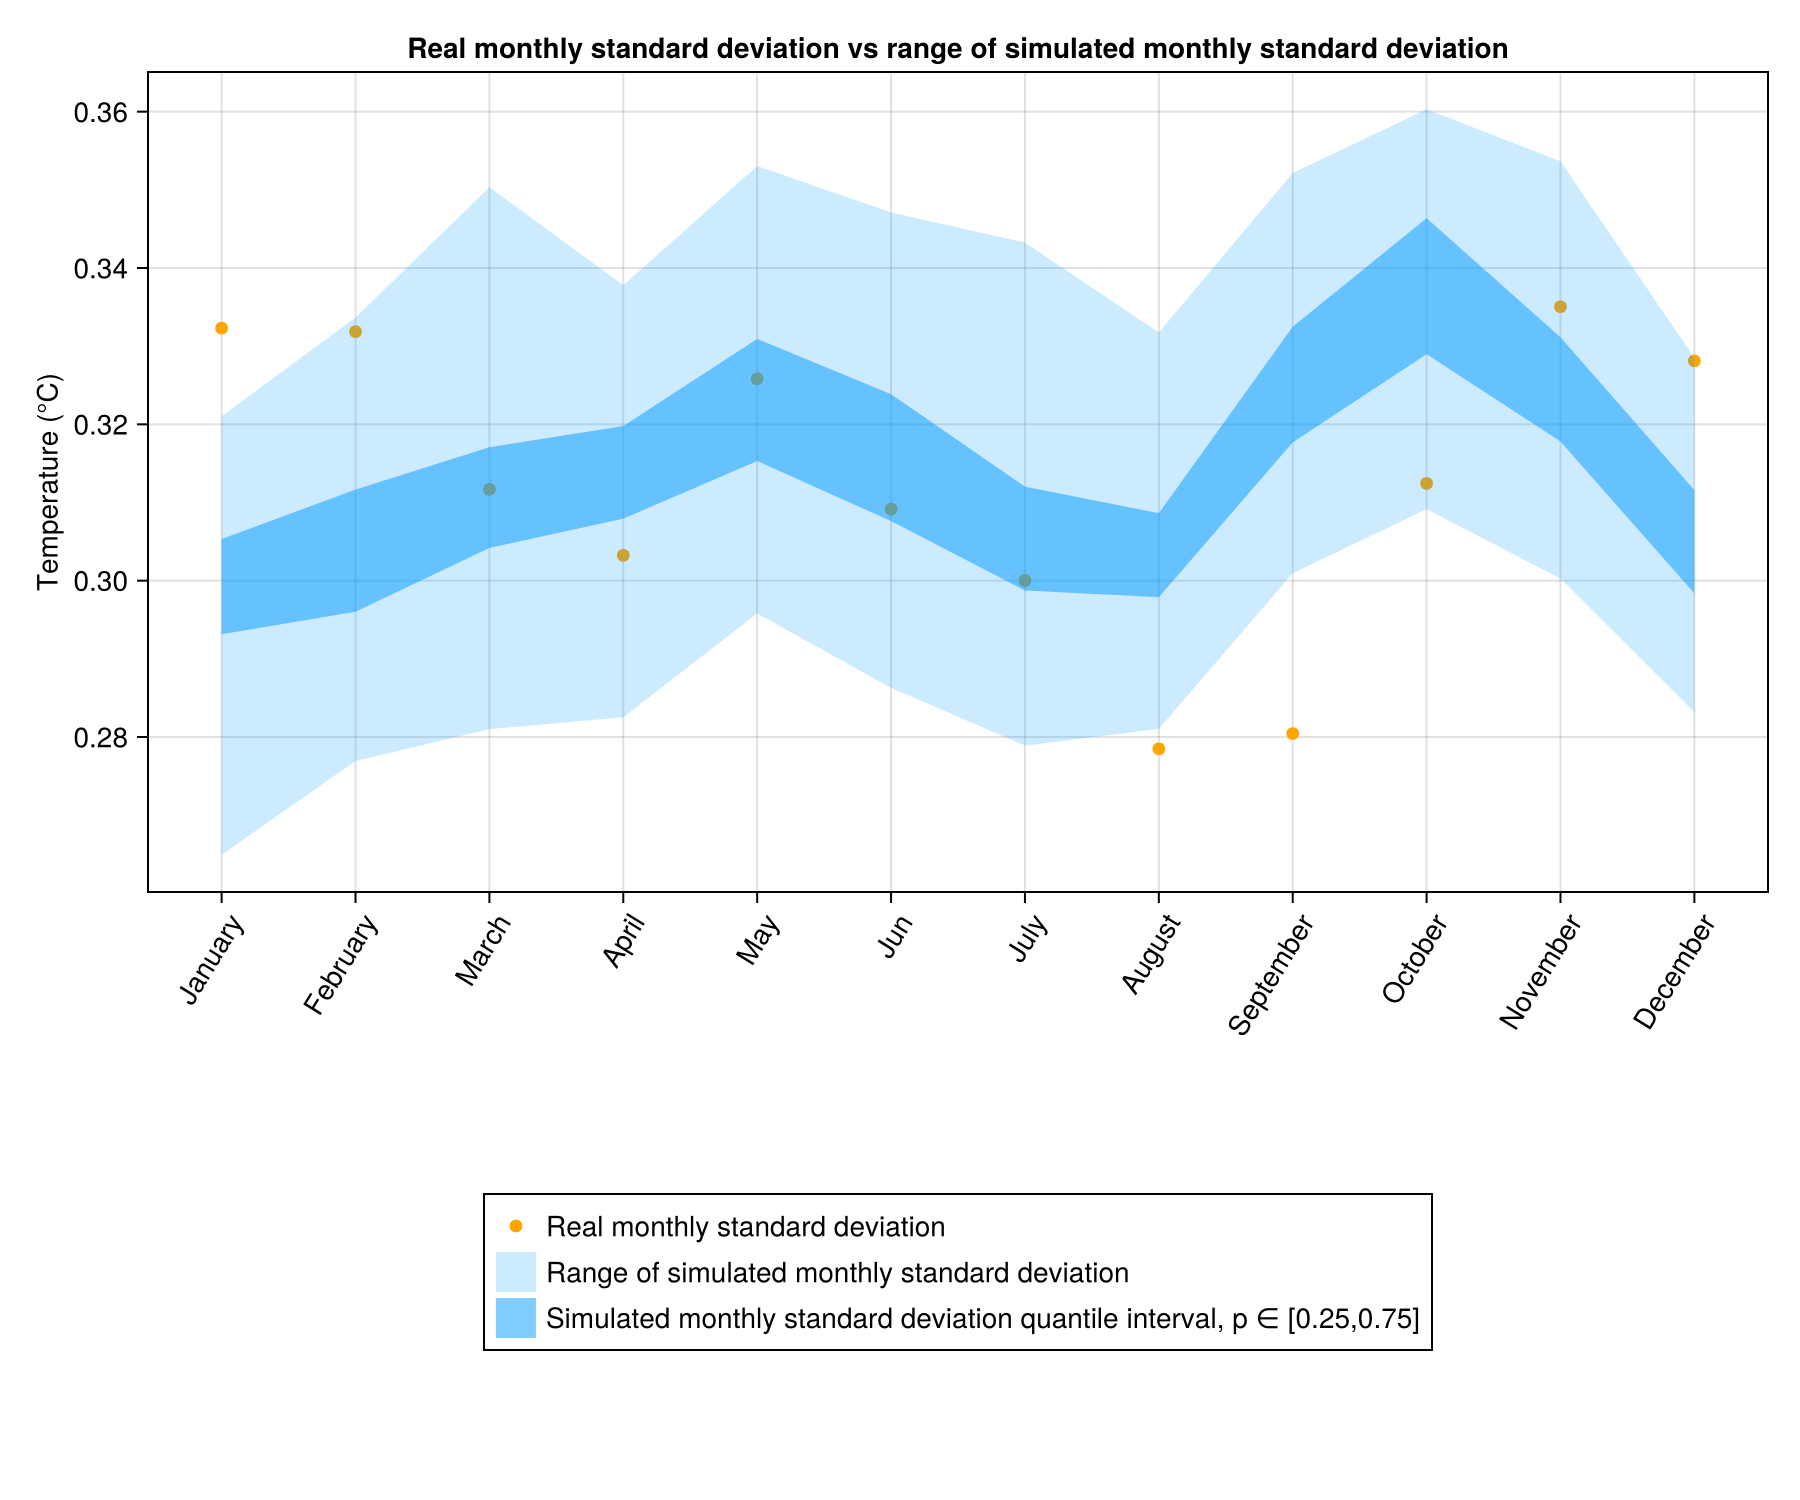

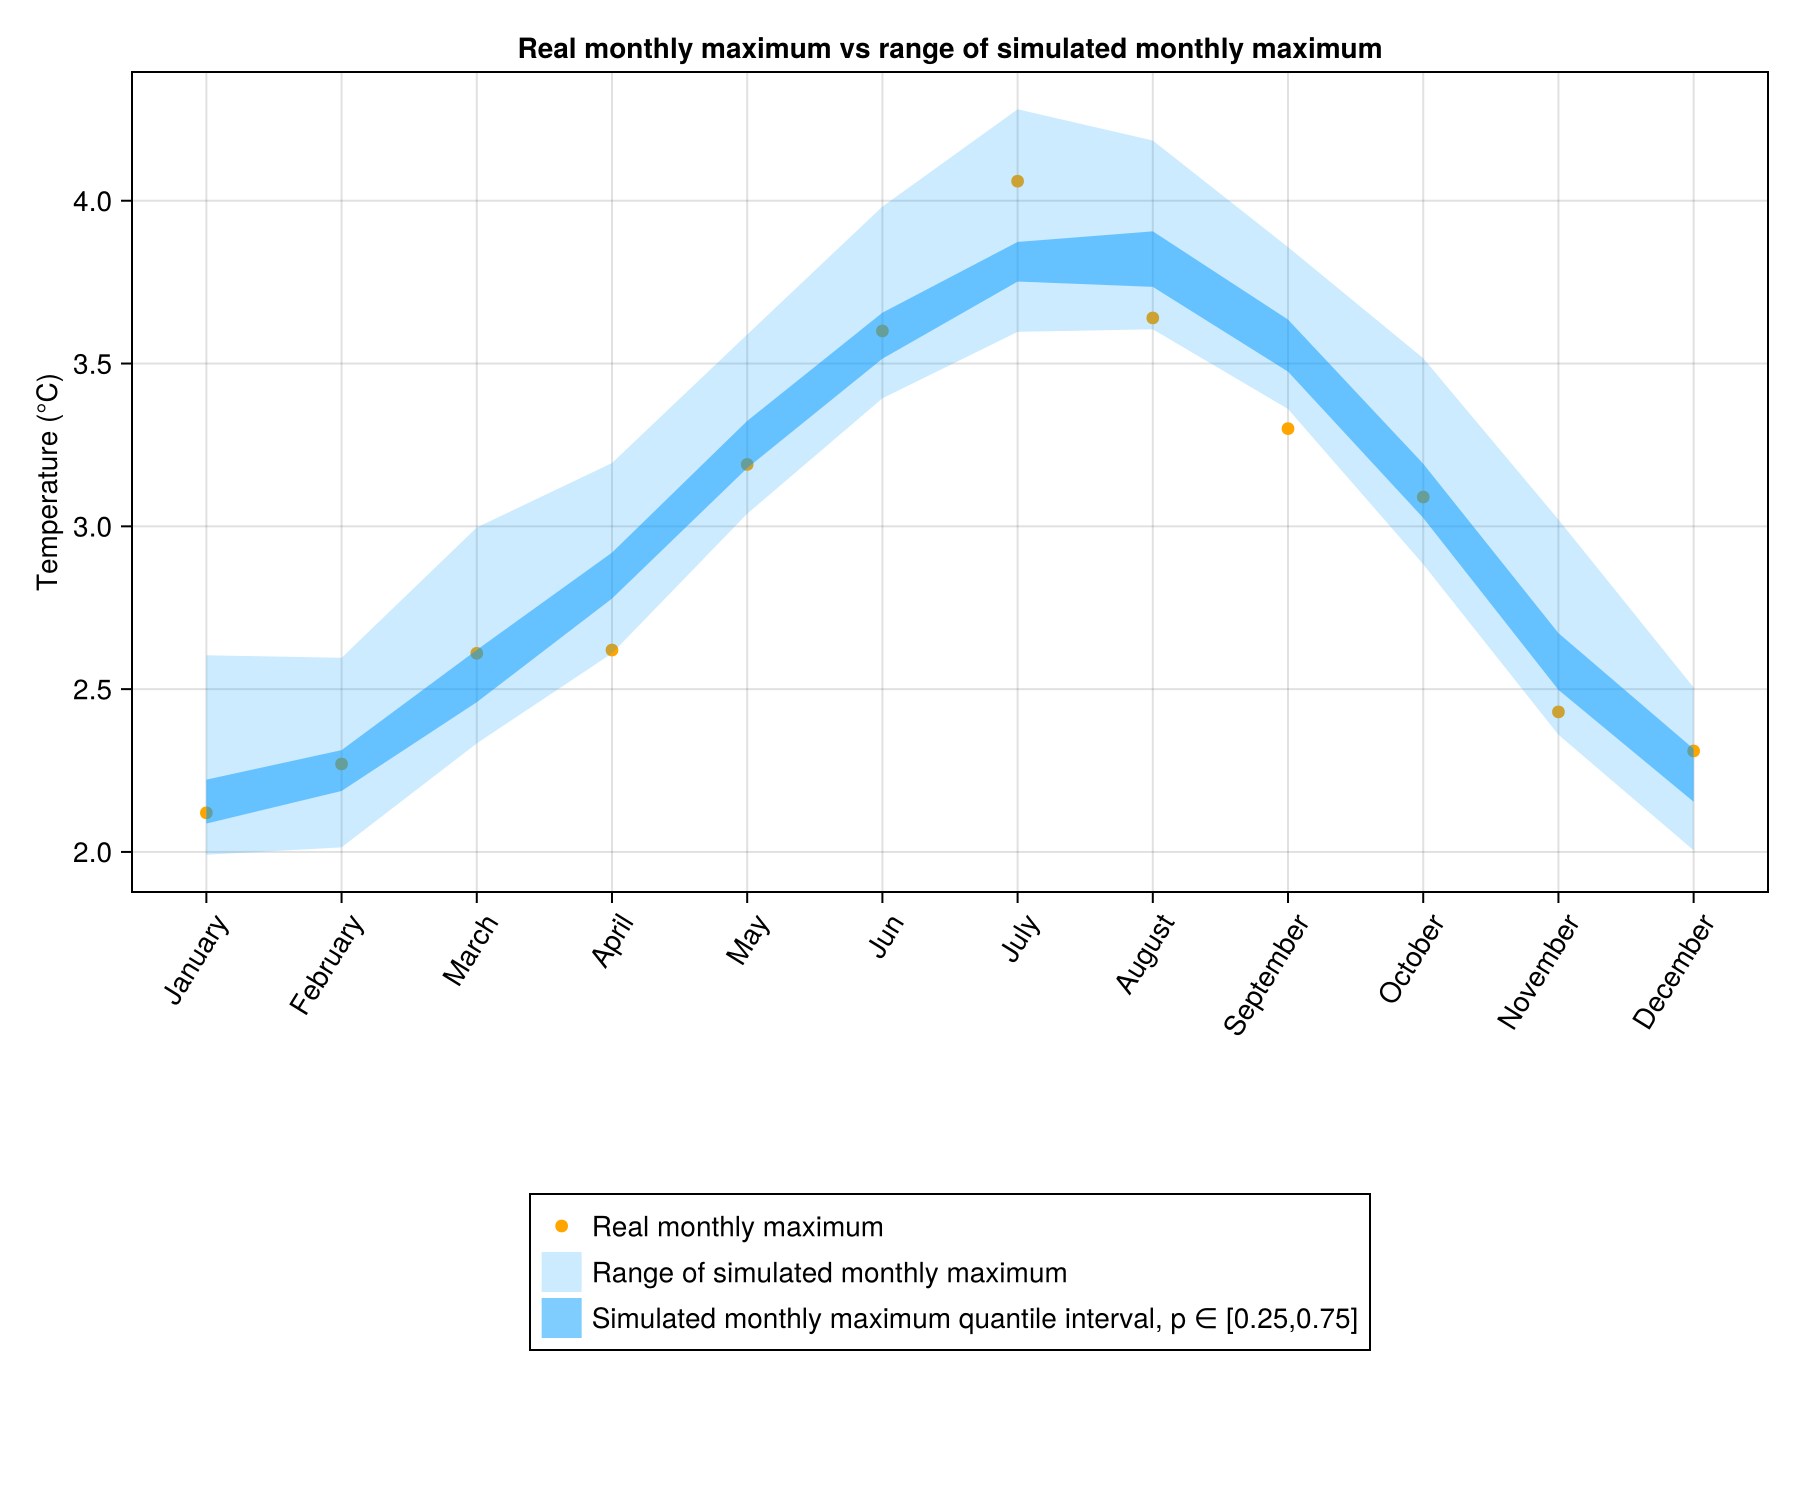

(CairoMakie.Screen{CairoMakie.IMAGE}(Scene (900px, 750px):
  0 Plots
  2 Child Scenes:
    ├ Scene (900px, 750px)
    └ Scene (900px, 750px), Cairo.CairoSurfaceImage{ColorTypes.ARGB32}(Ptr{Nothing} @0x000001aa1ee3bb90, 1800.0, 1500.0, ColorTypes.ARGB32[ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); … ; ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8); ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) … ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8) ARGB32(1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8)]), Cairo.CairoContext(Ptr{Nothing} @0x000001

In [8]:
include("../utils/Simulation.jl")
include("../utils/Plotting.jl")
sample_ = SimulateScenarios(x[1:p], series.DATE[1]:series.DATE[end], Φ, σ, period2; n=100)
year_sample = GatherYearScenarios(sample_, series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period2, mean.(year_sample)], ["Periodicity estimation", "Mean simulated temperatures, AR($(p))"], "Average daily temperature during a year (centered), with AR($(p)) model simulation"))
display(PlotYearCurves([period2, avg_day, max_day],
    ["Periodicity estimation", "Average recorded temperatures", "Maximum recorded temperatures", "Simulated temperatures range", "Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
    "Average daily temperature during a year (centered), with AR($(p)) model simulation",
    [(minimum.(year_sample), maximum.(year_sample)), (quantile.(year_sample, 0.25), quantile.(year_sample, 0.75))],
    [("#009bff", 0.2), ("#009bff", 0.5)],
    colors=["blue", "orange", "red"]
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))

# Order = 3

In this model the periodicity $S_t$ will follow this equation :  $S_t = \mu + a_1\cos(\frac{2πt}{365.25}) + b_1\sin(\frac{2πt}{365.25}) + a_2\cos(2 \times \frac{2πt}{365.25}) + b_2\sin(2 \times \frac{2πt}{365.25}) +
a_3\cos(3 \times \frac{2πt}{365.25}) + b_3\sin(3 \times \frac{2πt}{365.25})$.

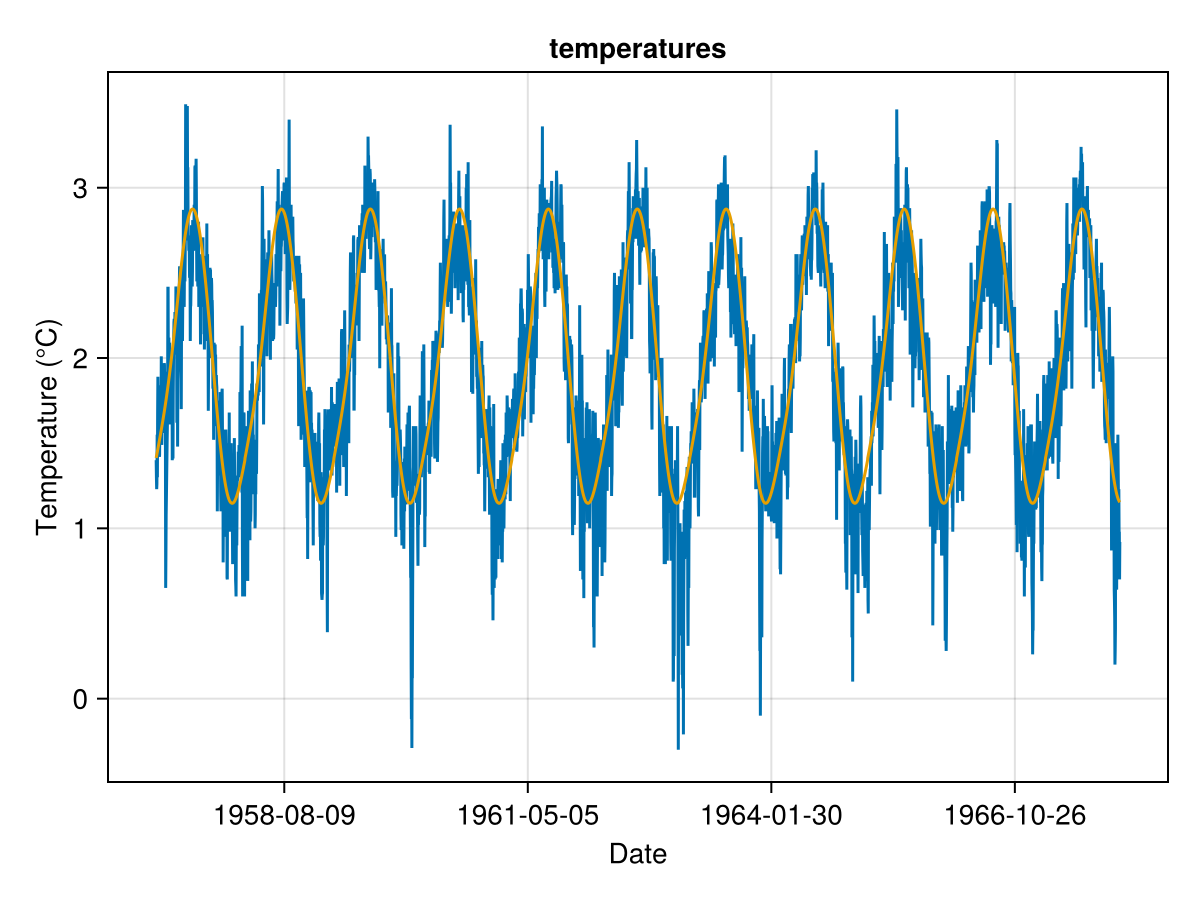

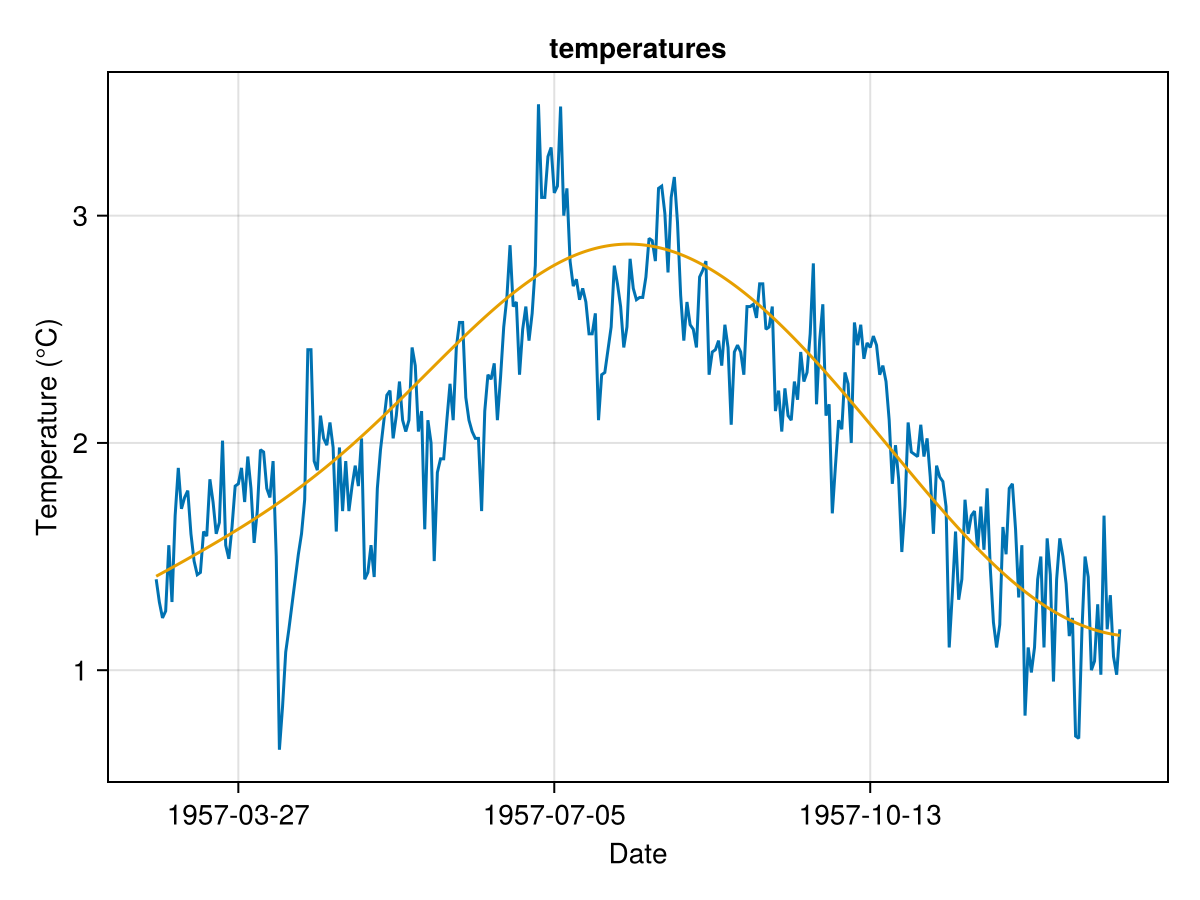

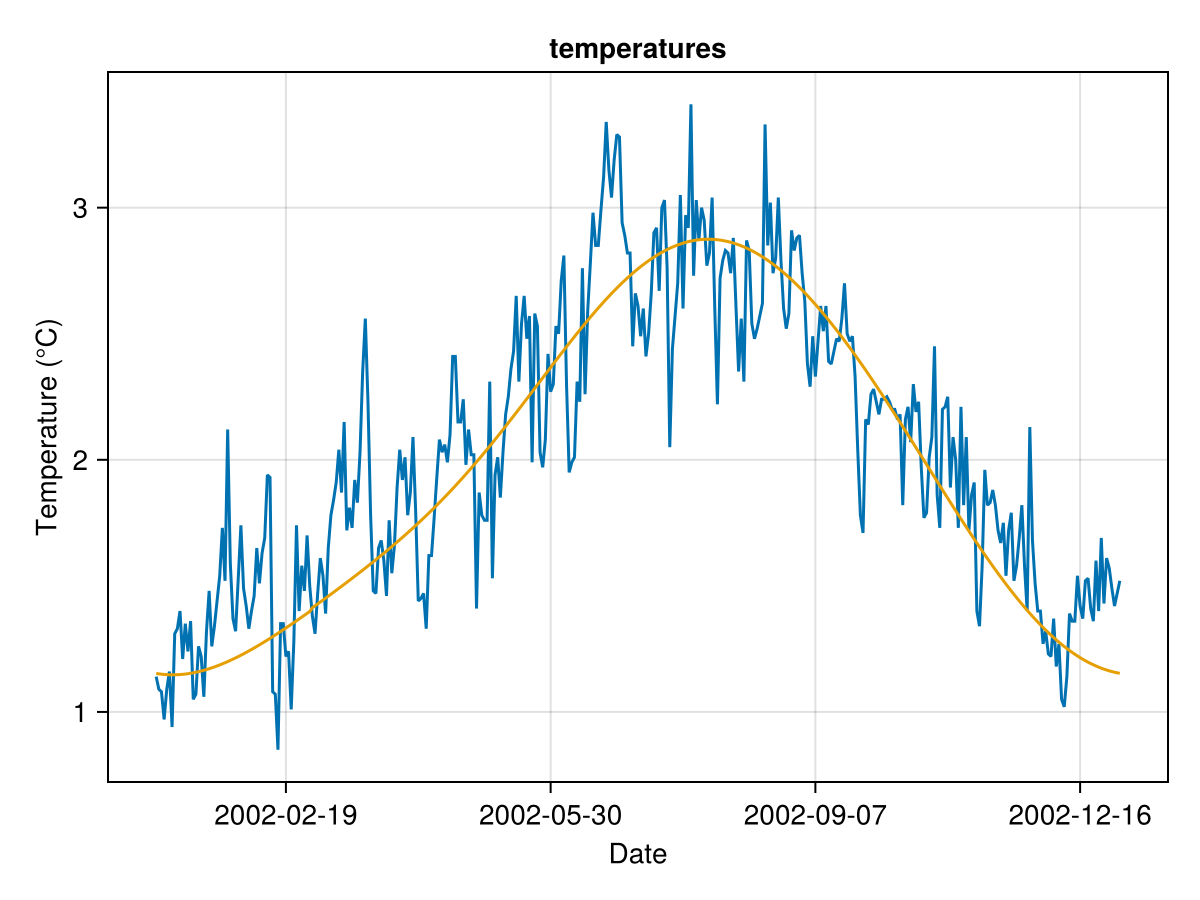

16832-element Vector{Float64}:
 -0.013262752730220706
 -0.12080757298933897
 -0.19838491999389007
 -0.17599402621103355
  0.10636566585880414
 -0.1513054940643752
  0.22099263871632835
  0.4232600071281558
  0.23549635607217967
  0.2777012366487377
  ⋮
  0.26297864608366783
  0.05460118972358208
 -0.09383351187865907
 -0.18232808816146817
  0.009114770375091563
  0.2904923225509386
  0.3318017870386254
  0.18304035302312371
  0.24420519096456794

In [9]:
trigo_function=fitted_periodicity_fonc(series[!,2],series.DATE, OrderTrig=3)
periodicity3=trigo_function.(series.DATE)
period3=trigo_function.(Date(0):Date(1)-Day(1))

Myyear=Iyear(series.DATE,year(series.DATE[1]):year(series.DATE[1]) + 10)
fig1, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity3[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig1)

Myyear=Iyear(series.DATE,year(series.DATE[1]))
fig2, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity3[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig2)

Myyear=Iyear(series.DATE,year(series.DATE[end])-1)
fig3, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity3[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig3)

x=series[!,2]-periodicity3

### Comparing orders

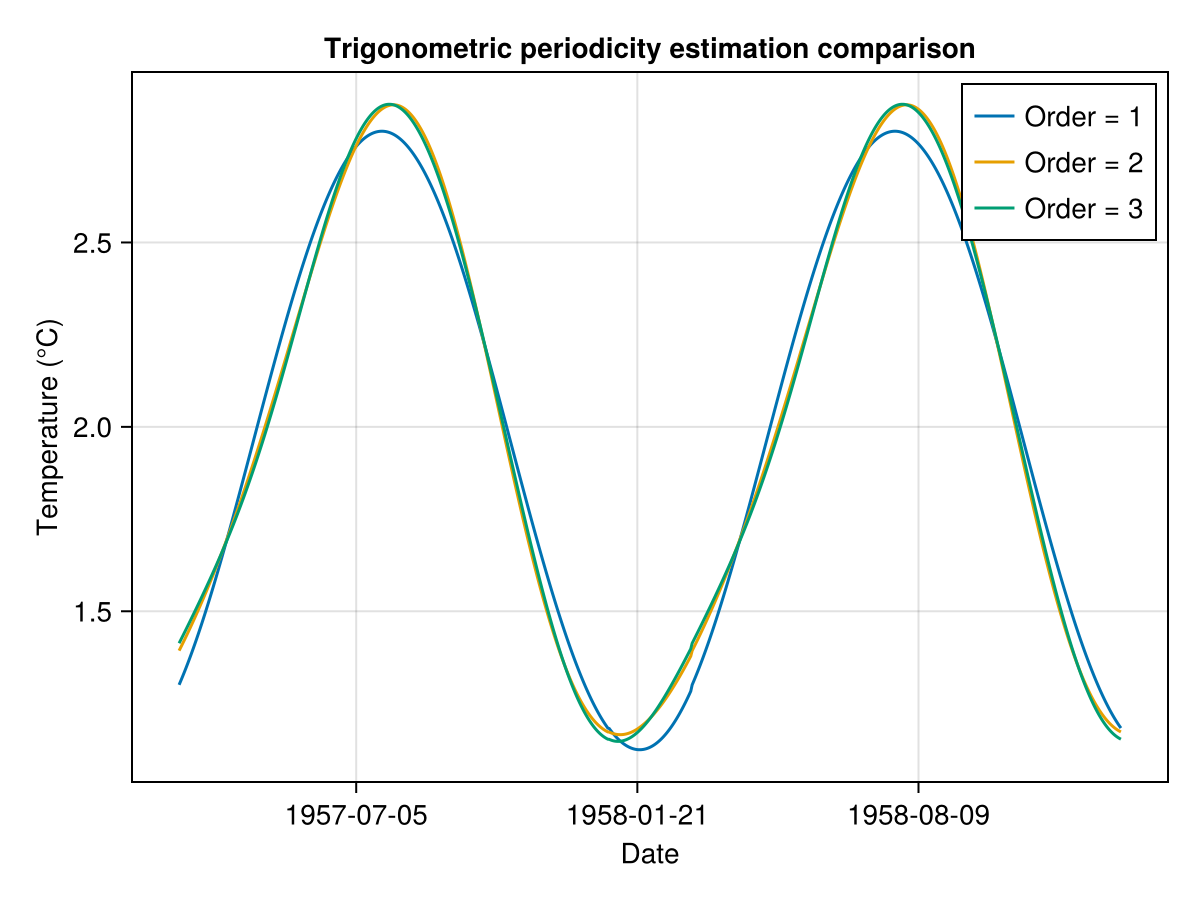

CairoMakie.Screen{IMAGE}


In [10]:

Myyear=Iyear(series.DATE,year(series.DATE[1]):year(series.DATE[1]) + 1)
fig, ax, plt1 = lines(series.DATE[Myyear],periodicity1[Myyear])
plt2 = lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
plt3 = lines!(ax,series.DATE[Myyear],periodicity3[Myyear])
ax.title="Trigonometric periodicity estimation comparison"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
axislegend(ax,[plt1,plt2,plt3],["Order = 1","Order = 2","Order = 3"])
display(fig)


## Autocorrelations

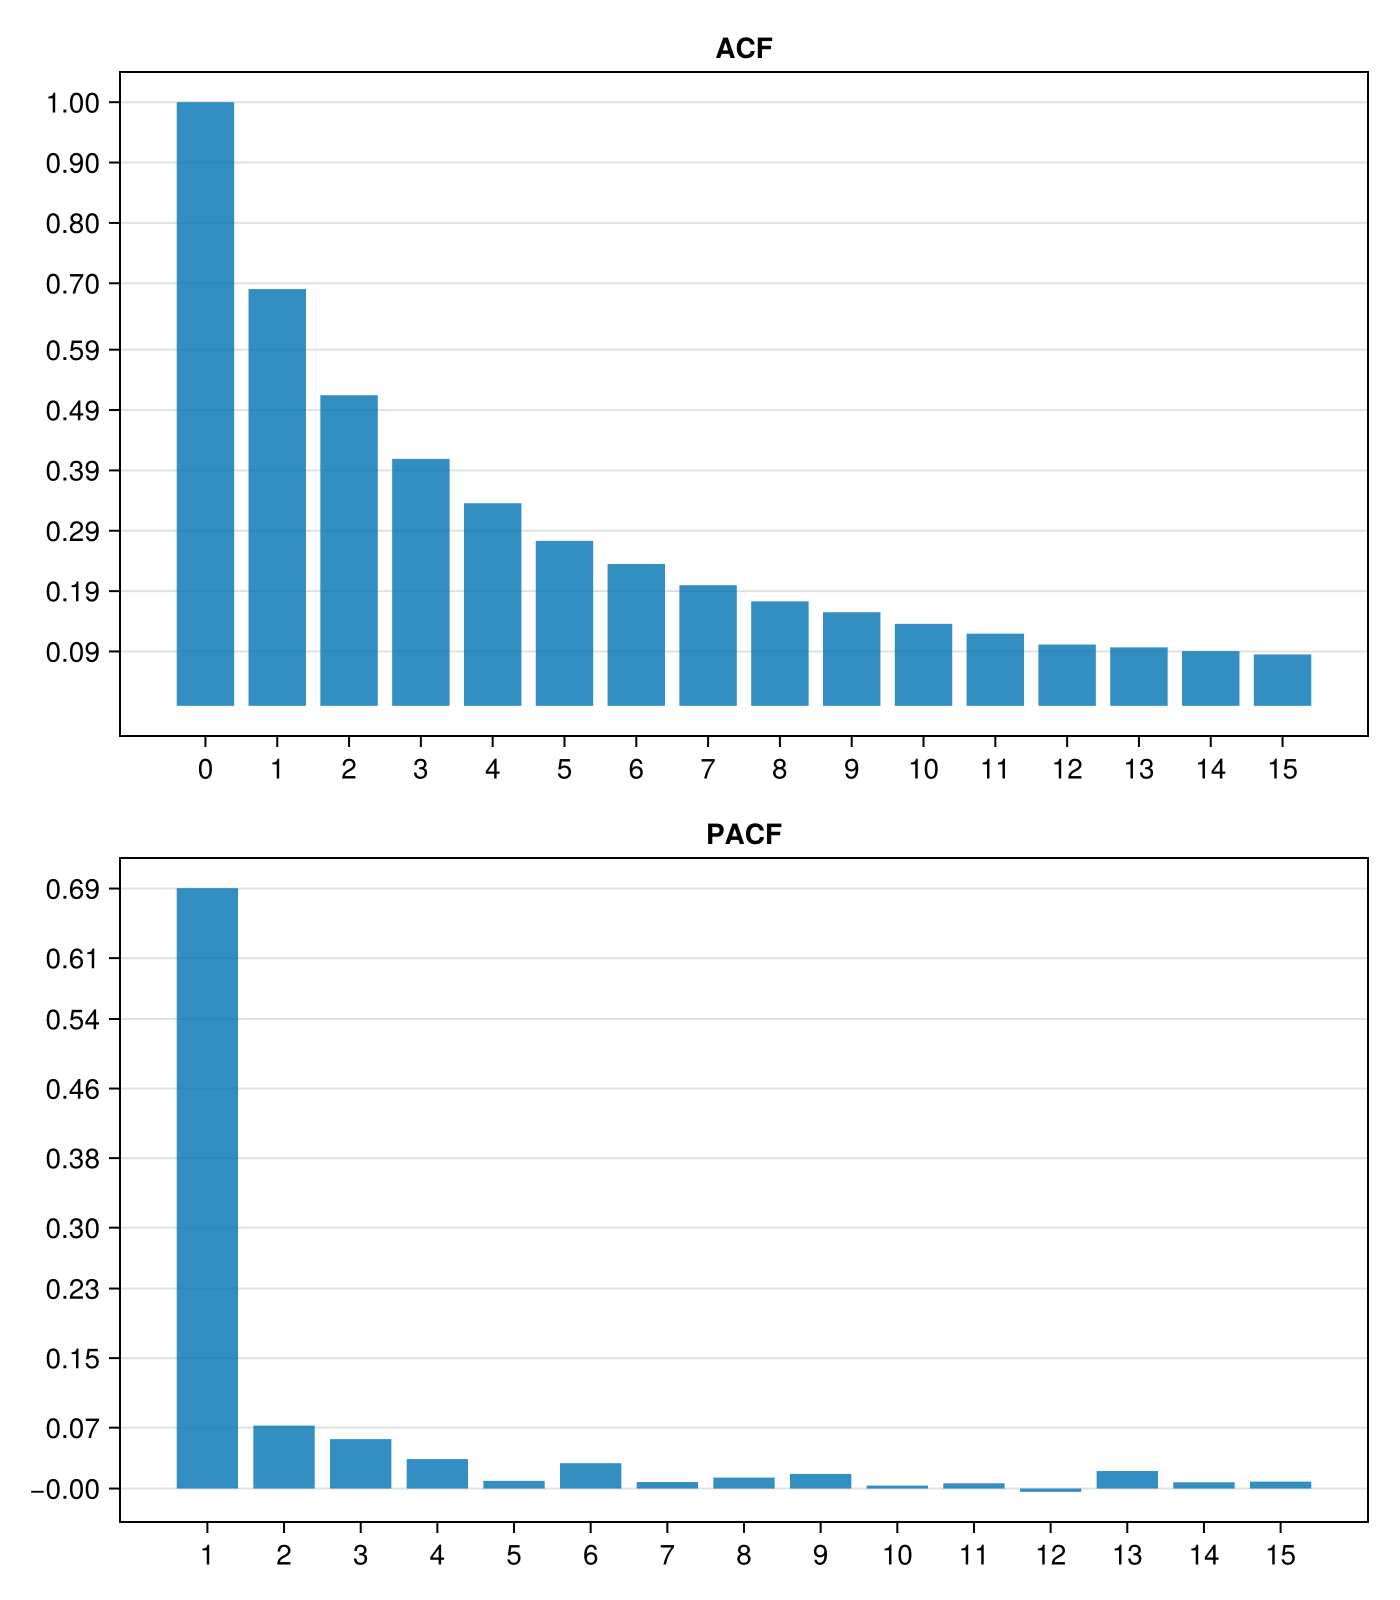

In [11]:
ACF_PACF(x)

It still looks like an AR(1) model

## Estimation with Likelihood : AR(1)

In [12]:
p=1
Φ, σ=LL_AR_Estimation(x,p)

([0.6904065899244162], 0.21737793799340643)

## Sampling simulations

In [ ]:
sample_=SimulateScenarios(x[1:p], series.DATE[1]:series.DATE[end], Φ, σ, period3; n=100)
year_sample=GatherYearScenarios(sample_, series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period3,mean.(year_sample)],["Periodicity estimation","Mean simulated temperatures, AR($(p))"],"Average daily temperature during a year (centered), with AR($(p)) model simulation"))
display(PlotYearCurves([period3,avg_day,max_day],
["Periodicity estimation","Average recorded temperatures","Maximum recorded temperatures","Simulated temperatures range","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered), with AR($(p)) model simulation",
[(minimum.(year_sample),maximum.(year_sample)),(quantile.(year_sample,0.25),quantile.(year_sample,0.75))],
[("#009bff",0.2),("#009bff",0.5)],
colors=["blue","orange","red"]
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))

## Estimation with Likelihood : AR(2)

In [ ]:
p = 2
Φ, σ = LL_AR_Estimation(x, p)

## Sampling simulations

In [ ]:
sample_ = SimulateScenarios(x[1:p], series.DATE[1]:series.DATE[end], Φ, σ, period3; n=100)
year_sample = GatherYearScenarios(sample_, series.DATE[1]:series.DATE[end])
display(PlotYearCurves([period3, mean.(year_sample)], ["Periodicity estimation", "Mean simulated temperatures, AR($(p))"], "Average daily temperature during a year (centered), with AR($(p)) model simulation"))
display(PlotYearCurves([period3, avg_day, max_day],
    ["Periodicity estimation", "Average recorded temperatures", "Maximum recorded temperatures", "Simulated temperatures range", "Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
    "Average daily temperature during a year (centered), with AR($(p)) model simulation",
    [(minimum.(year_sample), maximum.(year_sample)), (quantile.(year_sample, 0.25), quantile.(year_sample, 0.75))],
    [("#009bff", 0.2), ("#009bff", 0.5)],
    colors=["blue", "orange", "red"]
))
display.(WrapPlotMonthlyStats(df_month, sample_, series.DATE[1]:series.DATE[end]))